<a href="https://colab.research.google.com/github/Walotex/DataMiningProjects/blob/main/Data_Mining_Project_Unsafe_places_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulated data of dangerous areas in the city of Mérida, Yucatán.


In [ ]:
#pip install shapely

In [ ]:
import json
import random
from shapely.geometry import shape, Point
import matplotlib.pyplot as plt
import pandas as pd
import csv
import numpy as np
from sklearn.cluster import KMeans

#Coordinates of Mérida in a Polygon shape

In [ ]:
# Your GeoJSON data representing the city polygon
city_polygon_data = {
    "type": "MultiPolygon",
    "coordinates": [
        [
            [
                [-89.713435,21.0142751],
                [-89.7129914,21.0142091],
                [
                    -89.7135573,
                    21.011812
                ],
                [
                    -89.7137655,
                    21.0105494
                ],
                [
                    -89.7138772,
                    21.0098634
                ],
                [
                    -89.7130045,
                    21.0095125
                ],
                [
                    -89.7132843,
                    21.0088696
                ],
                [
                    -89.7122809,
                    21.0086893
                ],
                [
                    -89.7108704,
                    21.008429
                ],
                [
                    -89.7108853,
                    21.008352
                ],
                [
                    -89.7108653,
                    21.0083477
                ],
                [
                    -89.7103863,
                    21.0082423
                ],
                [
                    -89.7104587,
                    21.0080367
                ],
                [
                    -89.7105954,
                    21.007715
                ],
                [
                    -89.7107374,
                    21.0074021
                ],
                [
                    -89.7109585,
                    21.0069147
                ],
                [
                    -89.7104862,
                    21.0067117
                ],
                [
                    -89.7099339,
                    21.0064714
                ],
                [
                    -89.7086783,
                    21.0059251
                ],
                [
                    -89.7086936,
                    21.0058685
                ],
                [
                    -89.708694,
                    21.0058222
                ],
                [
                    -89.7086699,
                    21.0057329
                ],
                [
                    -89.7086167,
                    21.0056576
                ],
                [
                    -89.7085274,
                    21.0056043
                ],
                [
                    -89.7084567,
                    21.005581
                ],
                [
                    -89.7083655,
                    21.005584
                ],
                [
                    -89.7082778,
                    21.0056167
                ],
                [
                    -89.708212,
                    21.0056674
                ],
                [
                    -89.7081661,
                    21.0057326
                ],
                [
                    -89.7081437,
                    21.0057937
                ],
                [
                    -89.7070644,
                    21.0056129
                ],
                [
                    -89.7068317,
                    21.0068211
                ],
                [
                    -89.7062594,
                    21.0067073
                ],
                [
                    -89.7057884,
                    21.0066116
                ],
                [
                    -89.7056763,
                    21.0065887
                ],
                [
                    -89.705643,
                    21.0073964
                ],
                [
                    -89.7046561,
                    21.0071911
                ],
                [
                    -89.7045055,
                    21.0089078
                ],
                [
                    -89.7032372,
                    21.0088614
                ],
                [
                    -89.7027179,
                    21.0088376
                ],
                [
                    -89.7025906,
                    21.0088361
                ],
                [
                    -89.7020856,
                    21.0088163
                ],
                [
                    -89.7019822,
                    21.0088124
                ],
                [
                    -89.701606,
                    21.0087976
                ],
                [
                    -89.7007272,
                    21.0087633
                ],
                [
                    -89.7006803,
                    21.0077133
                ],
                [
                    -89.7006658,
                    21.0073378
                ],
                [
                    -89.7006232,
                    21.0063475
                ],
                [
                    -89.7002972,
                    21.0054238
                ],
                [
                    -89.6993903,
                    21.0056402
                ],
                [
                    -89.6996512,
                    21.0068376
                ],
                [
                    -89.6995295,
                    21.0068352
                ],
                [
                    -89.69895,
                    21.0068241
                ],
                [
                    -89.6988299,
                    21.0063231
                ],
                [
                    -89.6982858,
                    21.0063165
                ],
                [
                    -89.6981524,
                    21.006619
                ],
                [
                    -89.6978823,
                    21.0072881
                ],
                [
                    -89.6970864,
                    21.0068477
                ],
                [
                    -89.6973932,
                    21.006108
                ],
                [
                    -89.6977108,
                    21.0060353
                ],
                [
                    -89.6978532,
                    21.0059985
                ],
                [
                    -89.6977358,
                    21.0055675
                ],
                [
                    -89.6975969,
                    21.0050571
                ],
                [
                    -89.6975831,
                    21.0050062
                ],
                [
                    -89.6969198,
                    21.0051621
                ],
                [
                    -89.6962754,
                    21.0053136
                ],
                [
                    -89.6955362,
                    21.0054873
                ],
                [
                    -89.6944006,
                    21.0057542
                ],
                [
                    -89.6941816,
                    21.0058057
                ],
                [
                    -89.6934936,
                    21.0059681
                ],
                [
                    -89.6934393,
                    21.0059851
                ],
                [
                    -89.6933911,
                    21.0059928
                ],
                [
                    -89.6923563,
                    21.0062418
                ],
                [
                    -89.6919462,
                    21.0063404
                ],
                [
                    -89.6913132,
                    21.0064927
                ],
                [
                    -89.6912189,
                    21.0065154
                ],
                [
                    -89.6911973,
                    21.0064512
                ],
                [
                    -89.6911477,
                    21.0063751
                ],
                [
                    -89.691101,
                    21.006329
                ],
                [
                    -89.6910307,
                    21.0062843
                ],
                [
                    -89.6909469,
                    21.0062577
                ],
                [
                    -89.690855,
                    21.006254
                ],
                [
                    -89.6907762,
                    21.0062639
                ],
                [
                    -89.6906925,
                    21.0063014
                ],
                [
                    -89.6905989,
                    21.0063874
                ],
                [
                    -89.6905558,
                    21.0064717
                ],
                [
                    -89.6905474,
                    21.0065669
                ],
                [
                    -89.6905573,
                    21.0066656
                ],
                [
                    -89.6905923,
                    21.0067424
                ],
                [
                    -89.6906205,
                    21.0067874
                ],
                [
                    -89.6901039,
                    21.0077215
                ],
                [
                    -89.6899735,
                    21.0079687
                ],
                [
                    -89.6898616,
                    21.0081812
                ],
                [
                    -89.6929224,
                    21.0096591
                ],
                [
                    -89.6925174,
                    21.010382
                ],
                [
                    -89.6927018,
                    21.0105665
                ],
                [
                    -89.6928863,
                    21.010751
                ],
                [
                    -89.692914,
                    21.0107787
                ],
                [
                    -89.6930302,
                    21.0108949
                ],
                [
                    -89.6935013,
                    21.0114269
                ],
                [
                    -89.6933968,
                    21.0116532
                ],
                [
                    -89.6932529,
                    21.0120153
                ],
                [
                    -89.6929175,
                    21.0128594
                ],
                [
                    -89.6928531,
                    21.0138082
                ],
                [
                    -89.6928609,
                    21.014731
                ],
                [
                    -89.6928341,
                    21.0154849
                ],
                [
                    -89.6928309,
                    21.0155746
                ],
                [
                    -89.6932587,
                    21.0156403
                ],
                [
                    -89.6932825,
                    21.0160361
                ],
                [
                    -89.693292,
                    21.0161053
                ],
                [
                    -89.6934083,
                    21.0161562
                ],
                [
                    -89.6933556,
                    21.0165256
                ],
                [
                    -89.6930724,
                    21.0185109
                ],
                [
                    -89.6929155,
                    21.0196105
                ],
                [
                    -89.6929119,
                    21.0196358
                ],
                [
                    -89.692875,
                    21.0198946
                ],
                [
                    -89.6935149,
                    21.0204355
                ],
                [
                    -89.6938532,
                    21.0207215
                ],
                [
                    -89.6936088,
                    21.0210201
                ],
                [
                    -89.6924832,
                    21.0223957
                ],
                [
                    -89.6899572,
                    21.0255508
                ],
                [
                    -89.6896849,
                    21.0253989
                ],
                [
                    -89.6892541,
                    21.0252081
                ],
                [
                    -89.6880509,
                    21.0246149
                ],
                [
                    -89.6824009,
                    21.0223309
                ],
                [
                    -89.6863788,
                    21.0152227
                ],
                [
                    -89.6852925,
                    21.0147189
                ],
                [
                    -89.686032,
                    21.0093022
                ],
                [
                    -89.6806401,
                    21.0061747
                ],
                [
                    -89.6805595,
                    21.0064999
                ],
                [
                    -89.6800404,
                    21.0062241
                ],
                [
                    -89.6792251,
                    21.0057588
                ],
                [
                    -89.6783785,
                    21.0052803
                ],
                [
                    -89.6775227,
                    21.004793
                ],
                [
                    -89.676666,
                    21.0043248
                ],
                [
                    -89.6758166,
                    21.0038424
                ],
                [
                    -89.6749672,
                    21.0033599
                ],
                [
                    -89.6741178,
                    21.0028775
                ],
                [
                    -89.6732685,
                    21.0023951
                ],
                [
                    -89.672417,
                    21.0019074
                ],
                [
                    -89.6721583,
                    21.0026757
                ],
                [
                    -89.6710459,
                    21.0021457
                ],
                [
                    -89.6707401,
                    21.0028865
                ],
                [
                    -89.6698893,
                    21.0029055
                ],
                [
                    -89.6698962,
                    21.0043375
                ],
                [
                    -89.6699014,
                    21.005421
                ],
                [
                    -89.6699053,
                    21.0062238
                ],
                [
                    -89.6698795,
                    21.0072127
                ],
                [
                    -89.6718827,
                    21.0071457
                ],
                [
                    -89.6740988,
                    21.0071696
                ],
                [
                    -89.6753354,
                    21.0071323
                ],
                [
                    -89.6750453,
                    21.0118858
                ],
                [
                    -89.6749599,
                    21.0141402
                ],
                [
                    -89.6749039,
                    21.0160014
                ],
                [
                    -89.6749048,
                    21.0168984
                ],
                [
                    -89.6748902,
                    21.0175195
                ],
                [
                    -89.6751895,
                    21.0197907
                ],
                [
                    -89.6754337,
                    21.0198548
                ],
                [
                    -89.6758565,
                    21.0208866
                ],
                [
                    -89.6755274,
                    21.0218533
                ],
                [
                    -89.6765465,
                    21.0220319
                ],
                [
                    -89.676226,
                    21.0230161
                ],
                [
                    -89.6759508,
                    21.023972
                ],
                [
                    -89.675621,
                    21.0249488
                ],
                [
                    -89.6766844,
                    21.0251537
                ],
                [
                    -89.6773697,
                    21.0252715
                ],
                [
                    -89.6778122,
                    21.026378
                ],
                [
                    -89.6763869,
                    21.0261255
                ],
                [
                    -89.6753349,
                    21.0259376
                ],
                [
                    -89.6750571,
                    21.0268773
                ],
                [
                    -89.6741132,
                    21.0267162
                ],
                [
                    -89.6737864,
                    21.0281308
                ],
                [
                    -89.6736739,
                    21.0283806
                ],
                [
                    -89.6727599,
                    21.0283701
                ],
                [
                    -89.6717764,
                    21.028361
                ],
                [
                    -89.6720009,
                    21.0278071
                ],
                [
                    -89.6710172,
                    21.0276278
                ],
                [
                    -89.6701478,
                    21.0274693
                ],
                [
                    -89.6690499,
                    21.0272691
                ],
                [
                    -89.6680663,
                    21.0270897
                ],
                [
                    -89.6670318,
                    21.0269017
                ],
                [
                    -89.6659973,
                    21.0267137
                ],
                [
                    -89.6649628,
                    21.0265257
                ],
                [
                    -89.6639283,
                    21.0263377
                ],
                [
                    -89.66419,
                    21.0257067
                ],
                [
                    -89.6642821,
                    21.0249788
                ],
                [
                    -89.6642303,
                    21.0249392
                ],
                [
                    -89.6623274,
                    21.0247709
                ],
                [
                    -89.6612804,
                    21.0246656
                ],
                [
                    -89.6612591,
                    21.0247217
                ],
                [
                    -89.6603436,
                    21.0245997
                ],
                [
                    -89.6598094,
                    21.0258575
                ],
                [
                    -89.6572389,
                    21.0328099
                ],
                [
                    -89.6608168,
                    21.0340731
                ],
                [
                    -89.6610804,
                    21.0341262
                ],
                [
                    -89.6621207,
                    21.0343358
                ],
                [
                    -89.663171,
                    21.0345473
                ],
                [
                    -89.6642233,
                    21.0347593
                ],
                [
                    -89.6642758,
                    21.0345919
                ],
                [
                    -89.6645744,
                    21.033639
                ],
                [
                    -89.665637,
                    21.0338329
                ],
                [
                    -89.6666628,
                    21.034018
                ],
                [
                    -89.66774,
                    21.0342124
                ],
                [
                    -89.6688208,
                    21.0344075
                ],
                [
                    -89.6698867,
                    21.0345998
                ],
                [
                    -89.6709396,
                    21.0347987
                ],
                [
                    -89.6720046,
                    21.0349818
                ],
                [
                    -89.6730695,
                    21.0351928
                ],
                [
                    -89.6762306,
                    21.0357786
                ],
                [
                    -89.6759468,
                    21.0367422
                ],
                [
                    -89.6756434,
                    21.0377147
                ],
                [
                    -89.6753396,
                    21.0386668
                ],
                [
                    -89.6730266,
                    21.0382475
                ],
                [
                    -89.672783,
                    21.0392387
                ],
                [
                    -89.6738894,
                    21.0394423
                ],
                [
                    -89.6749892,
                    21.0396993
                ],
                [
                    -89.6748131,
                    21.0402344
                ],
                [
                    -89.6746837,
                    21.0406793
                ],
                [
                    -89.6745284,
                    21.0411547
                ],
                [
                    -89.6743961,
                    21.0416319
                ],
                [
                    -89.6733299,
                    21.0414648
                ],
                [
                    -89.6722619,
                    21.0412661
                ],
                [
                    -89.6721128,
                    21.0417111
                ],
                [
                    -89.671949,
                    21.0421903
                ],
                [
                    -89.6713422,
                    21.0420891
                ],
                [
                    -89.6715328,
                    21.0415918
                ],
                [
                    -89.6717006,
                    21.0411695
                ],
                [
                    -89.6712166,
                    21.0410256
                ],
                [
                    -89.6701898,
                    21.0408066
                ],
                [
                    -89.6648856,
                    21.0397831
                ],
                [
                    -89.6647085,
                    21.0403483
                ],
                [
                    -89.6643267,
                    21.0415677
                ],
                [
                    -89.6672083,
                    21.0454594
                ],
                [
                    -89.6675231,
                    21.0458785
                ],
                [
                    -89.6680536,
                    21.0465623
                ],
                [
                    -89.6691295,
                    21.0481185
                ],
                [
                    -89.6692696,
                    21.0484271
                ],
                [
                    -89.6704456,
                    21.0516179
                ],
                [
                    -89.6716696,
                    21.0551778
                ],
                [
                    -89.6677552,
                    21.0563483
                ],
                [
                    -89.6668938,
                    21.0565949
                ],
                [
                    -89.6667635,
                    21.0566358
                ],
                [
                    -89.6675499,
                    21.0591881
                ],
                [
                    -89.666768,
                    21.0593967
                ],
                [
                    -89.6670972,
                    21.060435
                ],
                [
                    -89.6666324,
                    21.0605915
                ],
                [
                    -89.6651848,
                    21.0599395
                ],
                [
                    -89.6637292,
                    21.0592967
                ],
                [
                    -89.6646847,
                    21.0590102
                ],
                [
                    -89.6635117,
                    21.0558771
                ],
                [
                    -89.658971,
                    21.0571251
                ],
                [
                    -89.6590605,
                    21.0573733
                ],
                [
                    -89.6596945,
                    21.0576286
                ],
                [
                    -89.6596173,
                    21.0582681
                ],
                [
                    -89.6586165,
                    21.0583774
                ],
                [
                    -89.6585751,
                    21.0579919
                ],
                [
                    -89.6574959,
                    21.0581879
                ],
                [
                    -89.657529,
                    21.0587357
                ],
                [
                    -89.6555215,
                    21.0590304
                ],
                [
                    -89.655652,
                    21.0601415
                ],
                [
                    -89.6558502,
                    21.0620335
                ],
                [
                    -89.6546604,
                    21.0622426
                ],
                [
                    -89.6536486,
                    21.0624204
                ],
                [
                    -89.652797,
                    21.0625704
                ],
                [
                    -89.6529531,
                    21.062666
                ],
                [
                    -89.6517251,
                    21.0629133
                ],
                [
                    -89.6505245,
                    21.0631573
                ],
                [
                    -89.6473953,
                    21.0637933
                ],
                [
                    -89.6473775,
                    21.0640777
                ],
                [
                    -89.6472996,
                    21.0654382
                ],
                [
                    -89.6472381,
                    21.0665126
                ],
                [
                    -89.6489822,
                    21.0666415
                ],
                [
                    -89.6503494,
                    21.0667142
                ],
                [
                    -89.6514168,
                    21.0668091
                ],
                [
                    -89.6519419,
                    21.0668355
                ],
                [
                    -89.6524725,
                    21.066867
                ],
                [
                    -89.6537817,
                    21.0669817
                ],
                [
                    -89.6549562,
                    21.067087
                ],
                [
                    -89.6561307,
                    21.0671924
                ],
                [
                    -89.6566224,
                    21.0672901
                ],
                [
                    -89.6572248,
                    21.0674734
                ],
                [
                    -89.6573148,
                    21.0672732
                ],
                [
                    -89.6578537,
                    21.0673116
                ],
                [
                    -89.6594189,
                    21.0674233
                ],
                [
                    -89.6610567,
                    21.0675404
                ],
                [
                    -89.6621895,
                    21.0676273
                ],
                [
                    -89.6639243,
                    21.0677624
                ],
                [
                    -89.6649668,
                    21.067842
                ],
                [
                    -89.6668307,
                    21.0679859
                ],
                [
                    -89.6673203,
                    21.0680237
                ],
                [
                    -89.6689688,
                    21.0681509
                ],
                [
                    -89.6692212,
                    21.0681704
                ],
                [
                    -89.6694468,
                    21.0693348
                ],
                [
                    -89.669476,
                    21.0694852
                ],
                [
                    -89.6694923,
                    21.0695726
                ],
                [
                    -89.6694953,
                    21.0695724
                ],
                [
                    -89.6697874,
                    21.0695603
                ],
                [
                    -89.6717047,
                    21.0694781
                ],
                [
                    -89.6721797,
                    21.0694553
                ],
                [
                    -89.6723246,
                    21.0727194
                ],
                [
                    -89.6724605,
                    21.0751304
                ],
                [
                    -89.6720426,
                    21.075157
                ],
                [
                    -89.6717173,
                    21.0751884
                ],
                [
                    -89.6713437,
                    21.0752131
                ],
                [
                    -89.6709364,
                    21.0752338
                ],
                [
                    -89.670608,
                    21.0753019
                ],
                [
                    -89.6709347,
                    21.0767536
                ],
                [
                    -89.6711049,
                    21.0776043
                ],
                [
                    -89.6695835,
                    21.0776575
                ],
                [
                    -89.6688836,
                    21.0776959
                ],
                [
                    -89.6682556,
                    21.0777597
                ],
                [
                    -89.6676502,
                    21.0777758
                ],
                [
                    -89.6674041,
                    21.0777818
                ],
                [
                    -89.6673675,
                    21.0774665
                ],
                [
                    -89.667329,
                    21.0770164
                ],
                [
                    -89.6672947,
                    21.0765138
                ],
                [
                    -89.6672714,
                    21.0760689
                ],
                [
                    -89.6672359,
                    21.0755163
                ],
                [
                    -89.6668661,
                    21.0755476
                ],
                [
                    -89.6665,
                    21.0755703
                ],
                [
                    -89.666226,
                    21.0755922
                ],
                [
                    -89.6647335,
                    21.0757166
                ],
                [
                    -89.6644849,
                    21.0757763
                ],
                [
                    -89.6643385,
                    21.0767887
                ],
                [
                    -89.6639495,
                    21.0771435
                ],
                [
                    -89.6628075,
                    21.0772756
                ],
                [
                    -89.6628789,
                    21.0777145
                ],
                [
                    -89.6629548,
                    21.0781582
                ],
                [
                    -89.6630315,
                    21.0786073
                ],
                [
                    -89.6631123,
                    21.0790811
                ],
                [
                    -89.663185,
                    21.0795382
                ],
                [
                    -89.6633309,
                    21.0804557
                ],
                [
                    -89.6634045,
                    21.0809191
                ],
                [
                    -89.6634794,
                    21.0813903
                ],
                [
                    -89.6636408,
                    21.082326
                ],
                [
                    -89.6637266,
                    21.0828395
                ],
                [
                    -89.6641027,
                    21.0848445
                ],
                [
                    -89.6642969,
                    21.0856352
                ],
                [
                    -89.6712974,
                    21.085085
                ],
                [
                    -89.6720125,
                    21.086933
                ],
                [
                    -89.6701866,
                    21.0871058
                ],
                [
                    -89.6705353,
                    21.0885337
                ],
                [
                    -89.6693053,
                    21.0885757
                ],
                [
                    -89.6693868,
                    21.0893854
                ],
                [
                    -89.6718311,
                    21.0892987
                ],
                [
                    -89.6722356,
                    21.0903283
                ],
                [
                    -89.6733525,
                    21.0903289
                ],
                [
                    -89.6733414,
                    21.0910225
                ],
                [
                    -89.6695181,
                    21.0913357
                ],
                [
                    -89.6695479,
                    21.0918026
                ],
                [
                    -89.6679105,
                    21.0918957
                ],
                [
                    -89.6660393,
                    21.0919631
                ],
                [
                    -89.6648099,
                    21.0920453
                ],
                [
                    -89.6646431,
                    21.0905759
                ],
                [
                    -89.6629911,
                    21.0906088
                ],
                [
                    -89.6601351,
                    21.0907369
                ],
                [
                    -89.6600028,
                    21.0898126
                ],
                [
                    -89.6598962,
                    21.0885025
                ],
                [
                    -89.6548027,
                    21.0866421
                ],
                [
                    -89.6513021,
                    21.0853609
                ],
                [
                    -89.6514523,
                    21.0830485
                ],
                [
                    -89.6533084,
                    21.0836791
                ],
                [
                    -89.6548534,
                    21.0836731
                ],
                [
                    -89.6553728,
                    21.0836445
                ],
                [
                    -89.655729,
                    21.083415
                ],
                [
                    -89.6558211,
                    21.0831626
                ],
                [
                    -89.6557009,
                    21.0820574
                ],
                [
                    -89.6540809,
                    21.0821575
                ],
                [
                    -89.6538878,
                    21.0810363
                ],
                [
                    -89.6532962,
                    21.0806801
                ],
                [
                    -89.6519577,
                    21.0798741
                ],
                [
                    -89.6509948,
                    21.0801808
                ],
                [
                    -89.6493483,
                    21.0803319
                ],
                [
                    -89.6507289,
                    21.0778946
                ],
                [
                    -89.6531554,
                    21.0735735
                ],
                [
                    -89.6527093,
                    21.0733157
                ],
                [
                    -89.6532626,
                    21.0723166
                ],
                [
                    -89.6526917,
                    21.0723388
                ],
                [
                    -89.6520087,
                    21.072374
                ],
                [
                    -89.6515483,
                    21.072406
                ],
                [
                    -89.6499206,
                    21.072548
                ],
                [
                    -89.6486388,
                    21.072635
                ],
                [
                    -89.6468508,
                    21.0727821
                ],
                [
                    -89.6453313,
                    21.0729338
                ],
                [
                    -89.6452298,
                    21.0722376
                ],
                [
                    -89.6449493,
                    21.0704967
                ],
                [
                    -89.6447575,
                    21.0705102
                ],
                [
                    -89.6446142,
                    21.069537
                ],
                [
                    -89.644593,
                    21.0693854
                ],
                [
                    -89.6445867,
                    21.06929
                ],
                [
                    -89.6446125,
                    21.0691811
                ],
                [
                    -89.6446567,
                    21.0690633
                ],
                [
                    -89.6447285,
                    21.0689406
                ],
                [
                    -89.6447731,
                    21.0688444
                ],
                [
                    -89.6447849,
                    21.0687964
                ],
                [
                    -89.6447851,
                    21.0687401
                ],
                [
                    -89.6447723,
                    21.0686843
                ],
                [
                    -89.6447507,
                    21.0686278
                ],
                [
                    -89.6446216,
                    21.0684198
                ],
                [
                    -89.6444399,
                    21.0681255
                ],
                [
                    -89.6443772,
                    21.0680024
                ],
                [
                    -89.6443488,
                    21.0679403
                ],
                [
                    -89.6443272,
                    21.0678811
                ],
                [
                    -89.6443157,
                    21.067819
                ],
                [
                    -89.6441941,
                    21.0670675
                ],
                [
                    -89.6426508,
                    21.0671493
                ],
                [
                    -89.6427074,
                    21.0629593
                ],
                [
                    -89.6417746,
                    21.0630973
                ],
                [
                    -89.6401372,
                    21.0665026
                ],
                [
                    -89.6395556,
                    21.0677157
                ],
                [
                    -89.6408848,
                    21.0679037
                ],
                [
                    -89.6411012,
                    21.0681828
                ],
                [
                    -89.640468,
                    21.0691641
                ],
                [
                    -89.6403898,
                    21.0691371
                ],
                [
                    -89.6400074,
                    21.0698586
                ],
                [
                    -89.6395417,
                    21.0696707
                ],
                [
                    -89.6391404,
                    21.0704649
                ],
                [
                    -89.6387351,
                    21.0711195
                ],
                [
                    -89.6387387,
                    21.071244
                ],
                [
                    -89.6382974,
                    21.071272
                ],
                [
                    -89.6383651,
                    21.0717326
                ],
                [
                    -89.6383693,
                    21.0718257
                ],
                [
                    -89.6383785,
                    21.0718678
                ],
                [
                    -89.6384076,
                    21.0719581
                ],
                [
                    -89.6387186,
                    21.0734868
                ],
                [
                    -89.6378109,
                    21.0735517
                ],
                [
                    -89.638081,
                    21.0752123
                ],
                [
                    -89.6380057,
                    21.0752236
                ],
                [
                    -89.6386344,
                    21.0788605
                ],
                [
                    -89.6415086,
                    21.0784724
                ],
                [
                    -89.6420115,
                    21.0814021
                ],
                [
                    -89.6446072,
                    21.0827085
                ],
                [
                    -89.646241,
                    21.0835896
                ],
                [
                    -89.6461017,
                    21.0859008
                ],
                [
                    -89.6453081,
                    21.0858971
                ],
                [
                    -89.645314,
                    21.0861459
                ],
                [
                    -89.6453157,
                    21.0867259
                ],
                [
                    -89.6423248,
                    21.0866204
                ],
                [
                    -89.6409268,
                    21.0864782
                ],
                [
                    -89.6365729,
                    21.0860367
                ],
                [
                    -89.635822,
                    21.0819896
                ],
                [
                    -89.6357626,
                    21.0816827
                ],
                [
                    -89.6357538,
                    21.0816374
                ],
                [
                    -89.635585,
                    21.0808651
                ],
                [
                    -89.6352322,
                    21.0793011
                ],
                [
                    -89.6348571,
                    21.0769499
                ],
                [
                    -89.63477,
                    21.0764152
                ],
                [
                    -89.6345549,
                    21.0751807
                ],
                [
                    -89.6345135,
                    21.074841
                ],
                [
                    -89.634344,
                    21.0738005
                ],
                [
                    -89.6340621,
                    21.0720991
                ],
                [
                    -89.6340555,
                    21.0720592
                ],
                [
                    -89.633355,
                    21.0681742
                ],
                [
                    -89.6323931,
                    21.0684092
                ],
                [
                    -89.6314532,
                    21.0686563
                ],
                [
                    -89.6303263,
                    21.0690574
                ],
                [
                    -89.6298718,
                    21.0689142
                ],
                [
                    -89.6293605,
                    21.0687974
                ],
                [
                    -89.6285714,
                    21.0688898
                ],
                [
                    -89.6274918,
                    21.0688164
                ],
                [
                    -89.6274428,
                    21.068196
                ],
                [
                    -89.6263018,
                    21.0680999
                ],
                [
                    -89.6251897,
                    21.0679852
                ],
                [
                    -89.6212055,
                    21.0676704
                ],
                [
                    -89.6212828,
                    21.0712061
                ],
                [
                    -89.6202065,
                    21.0712339
                ],
                [
                    -89.6191808,
                    21.0712573
                ],
                [
                    -89.6191271,
                    21.0682003
                ],
                [
                    -89.6191352,
                    21.0676242
                ],
                [
                    -89.6181715,
                    21.0676454
                ],
                [
                    -89.6171251,
                    21.0675949
                ],
                [
                    -89.6157725,
                    21.0675568
                ],
                [
                    -89.6157879,
                    21.0681601
                ],
                [
                    -89.6146948,
                    21.0680361
                ],
                [
                    -89.6136166,
                    21.068015
                ],
                [
                    -89.6126915,
                    21.0680372
                ],
                [
                    -89.6113629,
                    21.0680505
                ],
                [
                    -89.6113408,
                    21.0672698
                ],
                [
                    -89.6113394,
                    21.0668833
                ],
                [
                    -89.6113294,
                    21.0668001
                ],
                [
                    -89.611303,
                    21.0667256
                ],
                [
                    -89.611152,
                    21.0664594
                ],
                [
                    -89.6111174,
                    21.0662894
                ],
                [
                    -89.611133,
                    21.0661425
                ],
                [
                    -89.6111225,
                    21.0656833
                ],
                [
                    -89.6111596,
                    21.0647562
                ],
                [
                    -89.6111749,
                    21.0635926
                ],
                [
                    -89.6112235,
                    21.0624903
                ],
                [
                    -89.6098092,
                    21.0626617
                ],
                [
                    -89.6098074,
                    21.0624354
                ],
                [
                    -89.6098018,
                    21.0617372
                ],
                [
                    -89.6097941,
                    21.0607777
                ],
                [
                    -89.6112463,
                    21.0608127
                ],
                [
                    -89.6112202,
                    21.0602517
                ],
                [
                    -89.6112433,
                    21.0590325
                ],
                [
                    -89.6091371,
                    21.0591734
                ],
                [
                    -89.6091227,
                    21.0584051
                ],
                [
                    -89.6091211,
                    21.0573769
                ],
                [
                    -89.6091061,
                    21.0557709
                ],
                [
                    -89.6090929,
                    21.0541341
                ],
                [
                    -89.60908,
                    21.0529519
                ],
                [
                    -89.6090733,
                    21.0519147
                ],
                [
                    -89.6090635,
                    21.0508967
                ],
                [
                    -89.6090488,
                    21.0498658
                ],
                [
                    -89.6090397,
                    21.0494043
                ],
                [
                    -89.606644,
                    21.0501067
                ],
                [
                    -89.6061494,
                    21.0468531
                ],
                [
                    -89.6007704,
                    21.0449382
                ],
                [
                    -89.6001684,
                    21.0472097
                ],
                [
                    -89.5996901,
                    21.049154
                ],
                [
                    -89.5996354,
                    21.049416
                ],
                [
                    -89.5986799,
                    21.0534666
                ],
                [
                    -89.5982883,
                    21.054991
                ],
                [
                    -89.5955737,
                    21.0537416
                ],
                [
                    -89.5938573,
                    21.0533401
                ],
                [
                    -89.5928553,
                    21.0531485
                ],
                [
                    -89.5928328,
                    21.0532474
                ],
                [
                    -89.5912024,
                    21.0529453
                ],
                [
                    -89.5914683,
                    21.0481525
                ],
                [
                    -89.5913102,
                    21.0481271
                ],
                [
                    -89.5914837,
                    21.0461265
                ],
                [
                    -89.5926579,
                    21.0443918
                ],
                [
                    -89.5955528,
                    21.0451505
                ],
                [
                    -89.5951282,
                    21.0457831
                ],
                [
                    -89.594996,
                    21.0459799
                ],
                [
                    -89.5942794,
                    21.0467378
                ],
                [
                    -89.5971635,
                    21.0473528
                ],
                [
                    -89.5981541,
                    21.0432317
                ],
                [
                    -89.597097,
                    21.0428352
                ],
                [
                    -89.5960399,
                    21.0424387
                ],
                [
                    -89.5949828,
                    21.0420421
                ],
                [
                    -89.5935745,
                    21.0415121
                ],
                [
                    -89.5935467,
                    21.0415593
                ],
                [
                    -89.593366,
                    21.0418319
                ],
                [
                    -89.5927138,
                    21.0416226
                ],
                [
                    -89.5911738,
                    21.0410363
                ],
                [
                    -89.5912608,
                    21.0407174
                ],
                [
                    -89.5903456,
                    21.0403801
                ],
                [
                    -89.5899844,
                    21.0402474
                ],
                [
                    -89.5875996,
                    21.0393647
                ],
                [
                    -89.5868998,
                    21.0391062
                ],
                [
                    -89.5853334,
                    21.0385562
                ],
                [
                    -89.5845017,
                    21.0382674
                ],
                [
                    -89.5845351,
                    21.0377661
                ],
                [
                    -89.5845432,
                    21.037697
                ],
                [
                    -89.5845858,
                    21.0375059
                ],
                [
                    -89.5833951,
                    21.0372899
                ],
                [
                    -89.5822045,
                    21.0370739
                ],
                [
                    -89.5810139,
                    21.036858
                ],
                [
                    -89.5803932,
                    21.0367673
                ],
                [
                    -89.5800202,
                    21.0366764
                ],
                [
                    -89.5793633,
                    21.0364642
                ],
                [
                    -89.5786524,
                    21.0362342
                ],
                [
                    -89.5783621,
                    21.0361402
                ],
                [
                    -89.5777327,
                    21.0358711
                ],
                [
                    -89.5775717,
                    21.0364033
                ],
                [
                    -89.5777898,
                    21.0364421
                ],
                [
                    -89.5774715,
                    21.0376841
                ],
                [
                    -89.5772302,
                    21.0386431
                ],
                [
                    -89.5771426,
                    21.0389913
                ],
                [
                    -89.5768305,
                    21.0389344
                ],
                [
                    -89.5757739,
                    21.0387257
                ],
                [
                    -89.5747174,
                    21.038517
                ],
                [
                    -89.5736608,
                    21.0383083
                ],
                [
                    -89.5726042,
                    21.0380997
                ],
                [
                    -89.5723935,
                    21.0388269
                ],
                [
                    -89.5715455,
                    21.0385953
                ],
                [
                    -89.5706581,
                    21.0383469
                ],
                [
                    -89.5704875,
                    21.036255
                ],
                [
                    -89.5706272,
                    21.0362081
                ],
                [
                    -89.5702542,
                    21.0349859
                ],
                [
                    -89.5699295,
                    21.0339221
                ],
                [
                    -89.5696184,
                    21.0338223
                ],
                [
                    -89.5676623,
                    21.0331273
                ],
                [
                    -89.5672874,
                    21.0329936
                ],
                [
                    -89.5669185,
                    21.0328505
                ],
                [
                    -89.5668186,
                    21.0327982
                ],
                [
                    -89.5667235,
                    21.0326381
                ],
                [
                    -89.5666535,
                    21.03249
                ],
                [
                    -89.5666625,
                    21.0323661
                ],
                [
                    -89.5666855,
                    21.0323235
                ],
                [
                    -89.5663974,
                    21.0318099
                ],
                [
                    -89.5663706,
                    21.0317628
                ],
                [
                    -89.5658135,
                    21.0307846
                ],
                [
                    -89.5657045,
                    21.0305784
                ],
                [
                    -89.5653088,
                    21.0300033
                ],
                [
                    -89.5652952,
                    21.0297581
                ],
                [
                    -89.5634802,
                    21.0263241
                ],
                [
                    -89.5629472,
                    21.0252186
                ],
                [
                    -89.5621172,
                    21.0260341
                ],
                [
                    -89.5618288,
                    21.0263142
                ],
                [
                    -89.5606625,
                    21.0273843
                ],
                [
                    -89.5602624,
                    21.0277455
                ],
                [
                    -89.5594454,
                    21.0284832
                ],
                [
                    -89.5586504,
                    21.0292062
                ],
                [
                    -89.5582578,
                    21.0292645
                ],
                [
                    -89.5573602,
                    21.0286342
                ],
                [
                    -89.5558987,
                    21.0285601
                ],
                [
                    -89.555837,
                    21.028557
                ],
                [
                    -89.5558185,
                    21.0285543
                ],
                [
                    -89.5555646,
                    21.0285281
                ],
                [
                    -89.5550411,
                    21.0281238
                ],
                [
                    -89.5545541,
                    21.0277577
                ],
                [
                    -89.5527,
                    21.024939
                ],
                [
                    -89.5522872,
                    21.0243115
                ],
                [
                    -89.5522481,
                    21.0241806
                ],
                [
                    -89.5522625,
                    21.0240806
                ],
                [
                    -89.5521849,
                    21.023802
                ],
                [
                    -89.5518596,
                    21.0237657
                ],
                [
                    -89.5517524,
                    21.0237488
                ],
                [
                    -89.5516711,
                    21.0239203
                ],
                [
                    -89.5516504,
                    21.0240135
                ],
                [
                    -89.5516365,
                    21.0241755
                ],
                [
                    -89.5502872,
                    21.0237112
                ],
                [
                    -89.5502549,
                    21.0237888
                ],
                [
                    -89.5501208,
                    21.0241109
                ],
                [
                    -89.5493198,
                    21.0238358
                ],
                [
                    -89.5492113,
                    21.0240978
                ],
                [
                    -89.5479767,
                    21.0237469
                ],
                [
                    -89.5482029,
                    21.0234522
                ],
                [
                    -89.548522,
                    21.0230897
                ],
                [
                    -89.5494892,
                    21.0234265
                ],
                [
                    -89.5496283,
                    21.0230437
                ],
                [
                    -89.5487862,
                    21.0227449
                ],
                [
                    -89.5487822,
                    21.022731
                ],
                [
                    -89.5477987,
                    21.0223903
                ],
                [
                    -89.5468675,
                    21.0220831
                ],
                [
                    -89.546867,
                    21.0220675
                ],
                [
                    -89.5468174,
                    21.0220589
                ],
                [
                    -89.5467016,
                    21.0220734
                ],
                [
                    -89.5461009,
                    21.0219571
                ],
                [
                    -89.5462621,
                    21.0199071
                ],
                [
                    -89.5470566,
                    21.0199508
                ],
                [
                    -89.5472123,
                    21.0199643
                ],
                [
                    -89.551716,
                    21.0205892
                ],
                [
                    -89.5510262,
                    21.0209795
                ],
                [
                    -89.5509157,
                    21.0209848
                ],
                [
                    -89.5514613,
                    21.0210595
                ],
                [
                    -89.5546991,
                    21.0197632
                ],
                [
                    -89.5550357,
                    21.0201851
                ],
                [
                    -89.5550871,
                    21.0213062
                ],
                [
                    -89.5576618,
                    21.0205168
                ],
                [
                    -89.5579523,
                    21.0205573
                ],
                [
                    -89.5587646,
                    21.0194872
                ],
                [
                    -89.5588281,
                    21.0194037
                ],
                [
                    -89.5597922,
                    21.0198159
                ],
                [
                    -89.5601947,
                    21.0201919
                ],
                [
                    -89.5596766,
                    21.0192003
                ],
                [
                    -89.5591585,
                    21.0182086
                ],
                [
                    -89.5601459,
                    21.0180357
                ],
                [
                    -89.5620825,
                    21.0176853
                ],
                [
                    -89.5623207,
                    21.0176422
                ],
                [
                    -89.5621732,
                    21.0168449
                ],
                [
                    -89.5638094,
                    21.0165843
                ],
                [
                    -89.5638852,
                    21.0165722
                ],
                [
                    -89.5636849,
                    21.0157214
                ],
                [
                    -89.5634726,
                    21.0148818
                ],
                [
                    -89.5634629,
                    21.0148432
                ],
                [
                    -89.5633754,
                    21.014497
                ],
                [
                    -89.5632789,
                    21.014431
                ],
                [
                    -89.562376,
                    21.0138136
                ],
                [
                    -89.5598017,
                    21.0122953
                ],
                [
                    -89.5574079,
                    21.0120755
                ],
                [
                    -89.5556992,
                    21.011931
                ],
                [
                    -89.5504089,
                    21.0115721
                ],
                [
                    -89.5503419,
                    21.0098299
                ],
                [
                    -89.5503064,
                    21.0094151
                ],
                [
                    -89.5493949,
                    21.0100769
                ],
                [
                    -89.5493709,
                    21.0090996
                ],
                [
                    -89.5487516,
                    21.0096397
                ],
                [
                    -89.5479619,
                    21.010306
                ],
                [
                    -89.5470372,
                    21.0110476
                ],
                [
                    -89.5470057,
                    21.0100662
                ],
                [
                    -89.5478739,
                    21.0093429
                ],
                [
                    -89.5478228,
                    21.0083464
                ],
                [
                    -89.5469817,
                    21.0090443
                ],
                [
                    -89.5453142,
                    21.0104205
                ],
                [
                    -89.5453012,
                    21.0095002
                ],
                [
                    -89.5452664,
                    21.0093259
                ],
                [
                    -89.5446225,
                    21.0097215
                ],
                [
                    -89.5445681,
                    21.0097266
                ],
                [
                    -89.5433398,
                    21.0104035
                ],
                [
                    -89.5432587,
                    21.0092273
                ],
                [
                    -89.5432165,
                    21.0082557
                ],
                [
                    -89.5413779,
                    21.0098221
                ],
                [
                    -89.5400096,
                    21.0110345
                ],
                [
                    -89.539461,
                    21.0101745
                ],
                [
                    -89.5377306,
                    21.0071614
                ],
                [
                    -89.5374413,
                    21.0063261
                ],
                [
                    -89.5374363,
                    21.0046131
                ],
                [
                    -89.5374362,
                    21.0045508
                ],
                [
                    -89.5384084,
                    21.0045982
                ],
                [
                    -89.5393444,
                    21.0046439
                ],
                [
                    -89.5412519,
                    21.0046625
                ],
                [
                    -89.5431503,
                    21.0046763
                ],
                [
                    -89.5431231,
                    21.0032101
                ],
                [
                    -89.5431141,
                    21.0025807
                ],
                [
                    -89.543086,
                    21.0010476
                ],
                [
                    -89.5430747,
                    21.0004204
                ],
                [
                    -89.543052,
                    20.9991205
                ],
                [
                    -89.5430354,
                    20.9983553
                ],
                [
                    -89.5430323,
                    20.9969636
                ],
                [
                    -89.5460076,
                    20.9969174
                ],
                [
                    -89.547552,
                    20.9968466
                ],
                [
                    -89.5470461,
                    20.9958353
                ],
                [
                    -89.5484844,
                    20.9958018
                ],
                [
                    -89.5484571,
                    20.9947515
                ],
                [
                    -89.5477408,
                    20.9947572
                ],
                [
                    -89.5476759,
                    20.992448
                ],
                [
                    -89.5477123,
                    20.9924419
                ],
                [
                    -89.547739,
                    20.9895575
                ],
                [
                    -89.5473126,
                    20.9895325
                ],
                [
                    -89.5473048,
                    20.9875657
                ],
                [
                    -89.5471303,
                    20.987455
                ],
                [
                    -89.5451172,
                    20.9872935
                ],
                [
                    -89.54511,
                    20.9878723
                ],
                [
                    -89.5451043,
                    20.9883356
                ],
                [
                    -89.5450918,
                    20.9893396
                ],
                [
                    -89.5441718,
                    20.9892784
                ],
                [
                    -89.543388,
                    20.9892349
                ],
                [
                    -89.5430922,
                    20.9894335
                ],
                [
                    -89.5421321,
                    20.9894439
                ],
                [
                    -89.5411388,
                    20.9894547
                ],
                [
                    -89.5400349,
                    20.9894667
                ],
                [
                    -89.5383406,
                    20.9894849
                ],
                [
                    -89.5383424,
                    20.9895858
                ],
                [
                    -89.5383364,
                    20.9900449
                ],
                [
                    -89.5383336,
                    20.9905069
                ],
                [
                    -89.5353696,
                    20.9905
                ],
                [
                    -89.5343568,
                    20.9905025
                ],
                [
                    -89.5343589,
                    20.9909769
                ],
                [
                    -89.5343608,
                    20.991404
                ],
                [
                    -89.5335195,
                    20.9913966
                ],
                [
                    -89.5326296,
                    20.9913937
                ],
                [
                    -89.5326293,
                    20.990965
                ],
                [
                    -89.5323625,
                    20.9905077
                ],
                [
                    -89.5318301,
                    20.9905095
                ],
                [
                    -89.5318157,
                    20.9900834
                ],
                [
                    -89.5318005,
                    20.9896322
                ],
                [
                    -89.5317856,
                    20.9891884
                ],
                [
                    -89.5303479,
                    20.989202
                ],
                [
                    -89.5302588,
                    20.985683
                ],
                [
                    -89.5301685,
                    20.9821163
                ],
                [
                    -89.5417983,
                    20.9820789
                ],
                [
                    -89.5438848,
                    20.98207
                ],
                [
                    -89.544162,
                    20.9820688
                ],
                [
                    -89.5455215,
                    20.982063
                ],
                [
                    -89.5472875,
                    20.9820555
                ],
                [
                    -89.5533129,
                    20.9820748
                ],
                [
                    -89.5548215,
                    20.9820586
                ],
                [
                    -89.5556523,
                    20.9820497
                ],
                [
                    -89.5560768,
                    20.9820451
                ],
                [
                    -89.5565411,
                    20.9820401
                ],
                [
                    -89.5566038,
                    20.9820395
                ],
                [
                    -89.5573485,
                    20.9820315
                ],
                [
                    -89.5575832,
                    20.9818419
                ],
                [
                    -89.557842,
                    20.9816874
                ],
                [
                    -89.5581022,
                    20.9815623
                ],
                [
                    -89.5581244,
                    20.9815522
                ],
                [
                    -89.5583273,
                    20.9814558
                ],
                [
                    -89.5584699,
                    20.9814042
                ],
                [
                    -89.558708,
                    20.9813526
                ],
                [
                    -89.5587999,
                    20.9813294
                ],
                [
                    -89.5588841,
                    20.9813082
                ],
                [
                    -89.558917,
                    20.9812981
                ],
                [
                    -89.5590046,
                    20.9812746
                ],
                [
                    -89.559072,
                    20.9797915
                ],
                [
                    -89.5590817,
                    20.9795785
                ],
                [
                    -89.5592543,
                    20.9780258
                ],
                [
                    -89.5584872,
                    20.9781422
                ],
                [
                    -89.5585508,
                    20.9777823
                ],
                [
                    -89.5585615,
                    20.9773019
                ],
                [
                    -89.5576607,
                    20.9773051
                ],
                [
                    -89.557081,
                    20.9773797
                ],
                [
                    -89.5570186,
                    20.9775514
                ],
                [
                    -89.5568061,
                    20.9777588
                ],
                [
                    -89.5564113,
                    20.9776827
                ],
                [
                    -89.5560309,
                    20.9775959
                ],
                [
                    -89.5559819,
                    20.9775848
                ],
                [
                    -89.5556445,
                    20.9775114
                ],
                [
                    -89.5555016,
                    20.9774752
                ],
                [
                    -89.5555237,
                    20.9771838
                ],
                [
                    -89.5555195,
                    20.9761927
                ],
                [
                    -89.5554662,
                    20.9753242
                ],
                [
                    -89.5554698,
                    20.9743146
                ],
                [
                    -89.5554391,
                    20.9732735
                ],
                [
                    -89.5554697,
                    20.9723345
                ],
                [
                    -89.5557677,
                    20.9723183
                ],
                [
                    -89.5558777,
                    20.9714911
                ],
                [
                    -89.555892,
                    20.9712864
                ],
                [
                    -89.5559287,
                    20.9705422
                ],
                [
                    -89.5565345,
                    20.9704681
                ],
                [
                    -89.5565996,
                    20.9704602
                ],
                [
                    -89.557035,
                    20.9705194
                ],
                [
                    -89.5570357,
                    20.9704741
                ],
                [
                    -89.5570379,
                    20.9695414
                ],
                [
                    -89.557774,
                    20.9694171
                ],
                [
                    -89.5578149,
                    20.9694102
                ],
                [
                    -89.558832,
                    20.9692761
                ],
                [
                    -89.5598745,
                    20.9691304
                ],
                [
                    -89.5598822,
                    20.9683105
                ],
                [
                    -89.5610013,
                    20.9681442
                ],
                [
                    -89.5608748,
                    20.9677246
                ],
                [
                    -89.5607663,
                    20.9673646
                ],
                [
                    -89.5607744,
                    20.9673054
                ],
                [
                    -89.5608837,
                    20.9663062
                ],
                [
                    -89.5609857,
                    20.9653504
                ],
                [
                    -89.561034,
                    20.964932
                ],
                [
                    -89.561112,
                    20.9642872
                ],
                [
                    -89.5612667,
                    20.9630368
                ],
                [
                    -89.5609386,
                    20.9630964
                ],
                [
                    -89.5598835,
                    20.963288
                ],
                [
                    -89.5593149,
                    20.9634024
                ],
                [
                    -89.5588324,
                    20.9635068
                ],
                [
                    -89.5587291,
                    20.9623554
                ],
                [
                    -89.5587211,
                    20.9622627
                ],
                [
                    -89.5588426,
                    20.9622808
                ],
                [
                    -89.5589813,
                    20.9622948
                ],
                [
                    -89.5592095,
                    20.9622603
                ],
                [
                    -89.5597525,
                    20.9621531
                ],
                [
                    -89.5607906,
                    20.9619977
                ],
                [
                    -89.5606356,
                    20.9610074
                ],
                [
                    -89.5605888,
                    20.960679
                ],
                [
                    -89.5602742,
                    20.9606324
                ],
                [
                    -89.5603935,
                    20.9598193
                ],
                [
                    -89.5604242,
                    20.9596742
                ],
                [
                    -89.5604287,
                    20.9596436
                ],
                [
                    -89.5605531,
                    20.9589384
                ],
                [
                    -89.5605832,
                    20.9587892
                ],
                [
                    -89.560807,
                    20.9576817
                ],
                [
                    -89.5609197,
                    20.9577145
                ],
                [
                    -89.5617024,
                    20.9579199
                ],
                [
                    -89.5624062,
                    20.9580534
                ],
                [
                    -89.5626806,
                    20.956859
                ],
                [
                    -89.5637264,
                    20.9571488
                ],
                [
                    -89.5637427,
                    20.9571533
                ],
                [
                    -89.5646988,
                    20.9574467
                ],
                [
                    -89.564828,
                    20.9566364
                ],
                [
                    -89.5652691,
                    20.9568349
                ],
                [
                    -89.5661321,
                    20.9571883
                ],
                [
                    -89.5673073,
                    20.9576378
                ],
                [
                    -89.5674239,
                    20.9568508
                ],
                [
                    -89.5676103,
                    20.955598
                ],
                [
                    -89.5678158,
                    20.9543536
                ],
                [
                    -89.5678919,
                    20.9538664
                ],
                [
                    -89.5679756,
                    20.9533855
                ],
                [
                    -89.568072,
                    20.9528547
                ],
                [
                    -89.5681226,
                    20.9526512
                ],
                [
                    -89.5683781,
                    20.9519072
                ],
                [
                    -89.5684792,
                    20.9516005
                ],
                [
                    -89.5687611,
                    20.9509474
                ],
                [
                    -89.5690561,
                    20.9504044
                ],
                [
                    -89.5692523,
                    20.9500431
                ],
                [
                    -89.5693276,
                    20.9499419
                ],
                [
                    -89.5695725,
                    20.9496192
                ],
                [
                    -89.5697251,
                    20.9494127
                ],
                [
                    -89.570341,
                    20.9485792
                ],
                [
                    -89.5711113,
                    20.9477799
                ],
                [
                    -89.5715591,
                    20.9474189
                ],
                [
                    -89.5725316,
                    20.9466626
                ],
                [
                    -89.5736139,
                    20.9458663
                ],
                [
                    -89.5738723,
                    20.9456774
                ],
                [
                    -89.5739424,
                    20.9456262
                ],
                [
                    -89.5744025,
                    20.9452885
                ],
                [
                    -89.574582,
                    20.945164
                ],
                [
                    -89.5752208,
                    20.9446963
                ],
                [
                    -89.5763969,
                    20.9438335
                ],
                [
                    -89.5775087,
                    20.942986
                ],
                [
                    -89.5786032,
                    20.9422199
                ],
                [
                    -89.5787484,
                    20.9421138
                ],
                [
                    -89.5790853,
                    20.9418488
                ],
                [
                    -89.5793545,
                    20.9416561
                ],
                [
                    -89.5797823,
                    20.9413476
                ],
                [
                    -89.5803836,
                    20.9408975
                ],
                [
                    -89.5804612,
                    20.9408402
                ],
                [
                    -89.5810473,
                    20.940408
                ],
                [
                    -89.5814198,
                    20.9401416
                ],
                [
                    -89.5815215,
                    20.9400688
                ],
                [
                    -89.5816078,
                    20.9400047
                ],
                [
                    -89.5823469,
                    20.9394553
                ],
                [
                    -89.5824389,
                    20.9393868
                ],
                [
                    -89.583145,
                    20.938862
                ],
                [
                    -89.5834062,
                    20.9386666
                ],
                [
                    -89.5842589,
                    20.9380366
                ],
                [
                    -89.5849914,
                    20.9375045
                ],
                [
                    -89.5854063,
                    20.9371912
                ],
                [
                    -89.5868572,
                    20.9361518
                ],
                [
                    -89.5879529,
                    20.935353
                ],
                [
                    -89.5886199,
                    20.9348667
                ],
                [
                    -89.5893919,
                    20.934289
                ],
                [
                    -89.5901639,
                    20.9337112
                ],
                [
                    -89.5909359,
                    20.9331335
                ],
                [
                    -89.5909878,
                    20.9330948
                ],
                [
                    -89.5916437,
                    20.9326095
                ],
                [
                    -89.5918282,
                    20.9324731
                ],
                [
                    -89.5926801,
                    20.9318595
                ],
                [
                    -89.5934487,
                    20.931306
                ],
                [
                    -89.5938626,
                    20.9310009
                ],
                [
                    -89.5944066,
                    20.9305999
                ],
                [
                    -89.5953646,
                    20.9298939
                ],
                [
                    -89.5953494,
                    20.929737
                ],
                [
                    -89.5952723,
                    20.9289354
                ],
                [
                    -89.5942268,
                    20.9297722
                ],
                [
                    -89.5942079,
                    20.9288158
                ],
                [
                    -89.5942068,
                    20.9287541
                ],
                [
                    -89.5942155,
                    20.9286474
                ],
                [
                    -89.5942396,
                    20.9276113
                ],
                [
                    -89.5942832,
                    20.9266376
                ],
                [
                    -89.5942966,
                    20.9260968
                ],
                [
                    -89.5943004,
                    20.9256167
                ],
                [
                    -89.5942621,
                    20.9248022
                ],
                [
                    -89.5942698,
                    20.9246011
                ],
                [
                    -89.5943181,
                    20.9235931
                ],
                [
                    -89.5943802,
                    20.9226063
                ],
                [
                    -89.5944361,
                    20.9217008
                ],
                [
                    -89.5945174,
                    20.9207521
                ],
                [
                    -89.5945272,
                    20.9204941
                ],
                [
                    -89.594529,
                    20.9204187
                ],
                [
                    -89.5945646,
                    20.9197392
                ],
                [
                    -89.5945587,
                    20.9195251
                ],
                [
                    -89.5945559,
                    20.9194218
                ],
                [
                    -89.5945569,
                    20.9193794
                ],
                [
                    -89.5945682,
                    20.9188786
                ],
                [
                    -89.5946131,
                    20.9184324
                ],
                [
                    -89.5946392,
                    20.9182055
                ],
                [
                    -89.5946682,
                    20.9179201
                ],
                [
                    -89.5947086,
                    20.9175474
                ],
                [
                    -89.5947716,
                    20.9169372
                ],
                [
                    -89.5947852,
                    20.9168226
                ],
                [
                    -89.5947843,
                    20.9167972
                ],
                [
                    -89.5947879,
                    20.9167439
                ],
                [
                    -89.5948125,
                    20.916373
                ],
                [
                    -89.5948683,
                    20.915357
                ],
                [
                    -89.5952369,
                    20.9154755
                ],
                [
                    -89.5956253,
                    20.9155694
                ],
                [
                    -89.5960197,
                    20.9156646
                ],
                [
                    -89.5964775,
                    20.9159754
                ],
                [
                    -89.5969412,
                    20.9162058
                ],
                [
                    -89.59761,
                    20.9164589
                ],
                [
                    -89.5980818,
                    20.9166781
                ],
                [
                    -89.5985136,
                    20.9168066
                ],
                [
                    -89.5988456,
                    20.916901
                ],
                [
                    -89.5990245,
                    20.9169649
                ],
                [
                    -89.5993682,
                    20.9170406
                ],
                [
                    -89.5993683,
                    20.9170406
                ],
                [
                    -89.5995604,
                    20.9179711
                ],
                [
                    -89.5997665,
                    20.9187728
                ],
                [
                    -89.5997864,
                    20.9188577
                ],
                [
                    -89.5988,
                    20.9188613
                ],
                [
                    -89.5981182,
                    20.9188875
                ],
                [
                    -89.5973953,
                    20.9188898
                ],
                [
                    -89.5974689,
                    20.9195589
                ],
                [
                    -89.5976425,
                    20.9205659
                ],
                [
                    -89.5978162,
                    20.9215729
                ],
                [
                    -89.5979609,
                    20.9225665
                ],
                [
                    -89.5981384,
                    20.9236509
                ],
                [
                    -89.5983025,
                    20.924654
                ],
                [
                    -89.5982157,
                    20.924649
                ],
                [
                    -89.5983894,
                    20.9256543
                ],
                [
                    -89.5984889,
                    20.9262242
                ],
                [
                    -89.5987064,
                    20.9273135
                ],
                [
                    -89.5987307,
                    20.9274352
                ],
                [
                    -89.5991038,
                    20.9271621
                ],
                [
                    -89.600002,
                    20.9264984
                ],
                [
                    -89.6008395,
                    20.9258795
                ],
                [
                    -89.6009002,
                    20.9258347
                ],
                [
                    -89.6009354,
                    20.9258089
                ],
                [
                    -89.6017941,
                    20.9251792
                ],
                [
                    -89.602688,
                    20.9245237
                ],
                [
                    -89.6035818,
                    20.9238682
                ],
                [
                    -89.6044757,
                    20.9232127
                ],
                [
                    -89.6050323,
                    20.9228045
                ],
                [
                    -89.6050962,
                    20.9227576
                ],
                [
                    -89.6053695,
                    20.9225572
                ],
                [
                    -89.6056674,
                    20.9223303
                ],
                [
                    -89.6057705,
                    20.9222517
                ],
                [
                    -89.6058186,
                    20.9222166
                ],
                [
                    -89.6066571,
                    20.9216043
                ],
                [
                    -89.6075436,
                    20.9209568
                ],
                [
                    -89.6084301,
                    20.9203094
                ],
                [
                    -89.6093939,
                    20.9195958
                ],
                [
                    -89.6096457,
                    20.9194118
                ],
                [
                    -89.6097269,
                    20.9193525
                ],
                [
                    -89.610165,
                    20.9190325
                ],
                [
                    -89.6109361,
                    20.9184691
                ],
                [
                    -89.6119092,
                    20.9177446
                ],
                [
                    -89.6128761,
                    20.9170247
                ],
                [
                    -89.6128824,
                    20.9170201
                ],
                [
                    -89.6129372,
                    20.9169801
                ],
                [
                    -89.6138725,
                    20.9162976
                ],
                [
                    -89.6144674,
                    20.9158599
                ],
                [
                    -89.6145317,
                    20.9158126
                ],
                [
                    -89.6146017,
                    20.9157611
                ],
                [
                    -89.6144889,
                    20.9156933
                ],
                [
                    -89.6142052,
                    20.9155227
                ],
                [
                    -89.6140256,
                    20.9154926
                ],
                [
                    -89.6138444,
                    20.9153305
                ],
                [
                    -89.6139081,
                    20.9152403
                ],
                [
                    -89.6141556,
                    20.9150469
                ],
                [
                    -89.6142037,
                    20.9149747
                ],
                [
                    -89.6140168,
                    20.9147702
                ],
                [
                    -89.6138136,
                    20.9145262
                ],
                [
                    -89.6136186,
                    20.9142324
                ],
                [
                    -89.6132998,
                    20.9140403
                ],
                [
                    -89.6130598,
                    20.9138401
                ],
                [
                    -89.6129598,
                    20.9138278
                ],
                [
                    -89.612004,
                    20.9144382
                ],
                [
                    -89.6115009,
                    20.9123845
                ],
                [
                    -89.610525,
                    20.9125476
                ],
                [
                    -89.6091578,
                    20.9127766
                ],
                [
                    -89.608488,
                    20.9128892
                ],
                [
                    -89.6081772,
                    20.9117819
                ],
                [
                    -89.6083913,
                    20.9117414
                ],
                [
                    -89.6092726,
                    20.9101297
                ],
                [
                    -89.6102863,
                    20.9102594
                ],
                [
                    -89.6096048,
                    20.9115142
                ],
                [
                    -89.6102401,
                    20.9113953
                ],
                [
                    -89.6115909,
                    20.9111423
                ],
                [
                    -89.6123424,
                    20.9105527
                ],
                [
                    -89.6125928,
                    20.9102893
                ],
                [
                    -89.6126436,
                    20.910185
                ],
                [
                    -89.6131218,
                    20.908861
                ],
                [
                    -89.6131522,
                    20.9077858
                ],
                [
                    -89.6134574,
                    20.9071531
                ],
                [
                    -89.61569,
                    20.9071106
                ],
                [
                    -89.6157275,
                    20.9066842
                ],
                [
                    -89.6169878,
                    20.9068547
                ],
                [
                    -89.6170805,
                    20.9065191
                ],
                [
                    -89.6174062,
                    20.9065412
                ],
                [
                    -89.6174365,
                    20.9063856
                ],
                [
                    -89.6181977,
                    20.9064351
                ],
                [
                    -89.6182383,
                    20.9044546
                ],
                [
                    -89.6162218,
                    20.9044755
                ],
                [
                    -89.6153039,
                    20.9044879
                ],
                [
                    -89.6152725,
                    20.9033067
                ],
                [
                    -89.6138649,
                    20.9033368
                ],
                [
                    -89.6140835,
                    20.9028794
                ],
                [
                    -89.6131072,
                    20.9027628
                ],
                [
                    -89.6133729,
                    20.9021916
                ],
                [
                    -89.6123987,
                    20.9020845
                ],
                [
                    -89.6121404,
                    20.9025715
                ],
                [
                    -89.6111416,
                    20.9024689
                ],
                [
                    -89.6115586,
                    20.9013755
                ],
                [
                    -89.6127144,
                    20.9014401
                ],
                [
                    -89.61396,
                    20.9014831
                ],
                [
                    -89.6140209,
                    20.9009279
                ],
                [
                    -89.6145942,
                    20.9009527
                ],
                [
                    -89.6148853,
                    20.9003739
                ],
                [
                    -89.6157468,
                    20.8993484
                ],
                [
                    -89.6162752,
                    20.899365
                ],
                [
                    -89.6162986,
                    20.898149
                ],
                [
                    -89.6158169,
                    20.8980891
                ],
                [
                    -89.6157051,
                    20.8977053
                ],
                [
                    -89.6162293,
                    20.8976824
                ],
                [
                    -89.6160708,
                    20.8966161
                ],
                [
                    -89.6153382,
                    20.8964596
                ],
                [
                    -89.6150583,
                    20.8955425
                ],
                [
                    -89.6148157,
                    20.8955186
                ],
                [
                    -89.612827,
                    20.895469
                ],
                [
                    -89.6125963,
                    20.893928
                ],
                [
                    -89.6123778,
                    20.8931854
                ],
                [
                    -89.6141448,
                    20.892789
                ],
                [
                    -89.6143153,
                    20.8927589
                ],
                [
                    -89.6140366,
                    20.8912435
                ],
                [
                    -89.6137515,
                    20.8897987
                ],
                [
                    -89.6154068,
                    20.8896055
                ],
                [
                    -89.6153793,
                    20.8891484
                ],
                [
                    -89.6144336,
                    20.8888808
                ],
                [
                    -89.614364,
                    20.8882678
                ],
                [
                    -89.6136565,
                    20.8880833
                ],
                [
                    -89.6135165,
                    20.8869257
                ],
                [
                    -89.6133866,
                    20.8858672
                ],
                [
                    -89.6151243,
                    20.8861371
                ],
                [
                    -89.6178141,
                    20.8864726
                ],
                [
                    -89.6197804,
                    20.8867142
                ],
                [
                    -89.6197734,
                    20.886659
                ],
                [
                    -89.6198605,
                    20.8863146
                ],
                [
                    -89.6199307,
                    20.8858295
                ],
                [
                    -89.6199348,
                    20.8857261
                ],
                [
                    -89.6199619,
                    20.8856845
                ],
                [
                    -89.6200359,
                    20.8849369
                ],
                [
                    -89.6201652,
                    20.8839349
                ],
                [
                    -89.6213528,
                    20.8841703
                ],
                [
                    -89.6216292,
                    20.8842201
                ],
                [
                    -89.6222952,
                    20.8843467
                ],
                [
                    -89.6227926,
                    20.8831087
                ],
                [
                    -89.6228505,
                    20.8829515
                ],
                [
                    -89.6232633,
                    20.8817168
                ],
                [
                    -89.6242862,
                    20.8818011
                ],
                [
                    -89.6241515,
                    20.8808797
                ],
                [
                    -89.6236653,
                    20.8772436
                ],
                [
                    -89.6234934,
                    20.8757478
                ],
                [
                    -89.6228517,
                    20.8758317
                ],
                [
                    -89.6226099,
                    20.8740141
                ],
                [
                    -89.6236542,
                    20.8738918
                ],
                [
                    -89.6272243,
                    20.8735446
                ],
                [
                    -89.6280982,
                    20.8734333
                ],
                [
                    -89.629127,
                    20.8733088
                ],
                [
                    -89.629616,
                    20.8770392
                ],
                [
                    -89.6297173,
                    20.8779683
                ],
                [
                    -89.6297392,
                    20.8782309
                ],
                [
                    -89.6310524,
                    20.8783568
                ],
                [
                    -89.631025,
                    20.8791005
                ],
                [
                    -89.6308572,
                    20.8790913
                ],
                [
                    -89.6308155,
                    20.8797176
                ],
                [
                    -89.6299026,
                    20.8796305
                ],
                [
                    -89.6299249,
                    20.879913
                ],
                [
                    -89.6299858,
                    20.8812526
                ],
                [
                    -89.6323146,
                    20.881323
                ],
                [
                    -89.6323931,
                    20.8807515
                ],
                [
                    -89.6339112,
                    20.8807866
                ],
                [
                    -89.6349194,
                    20.8808839
                ],
                [
                    -89.6349075,
                    20.8828043
                ],
                [
                    -89.6344382,
                    20.8839044
                ],
                [
                    -89.6333723,
                    20.8837996
                ],
                [
                    -89.632365,
                    20.8836904
                ],
                [
                    -89.6312904,
                    20.8835758
                ],
                [
                    -89.6301418,
                    20.8834555
                ],
                [
                    -89.6292308,
                    20.8833615
                ],
                [
                    -89.6291949,
                    20.8836552
                ],
                [
                    -89.6290857,
                    20.8845133
                ],
                [
                    -89.6309396,
                    20.8849163
                ],
                [
                    -89.6319469,
                    20.8851271
                ],
                [
                    -89.6338657,
                    20.8855148
                ],
                [
                    -89.6335775,
                    20.8862775
                ],
                [
                    -89.633563,
                    20.8863157
                ],
                [
                    -89.6329209,
                    20.8879001
                ],
                [
                    -89.6323147,
                    20.8878703
                ],
                [
                    -89.6320176,
                    20.8878768
                ],
                [
                    -89.6312894,
                    20.8877887
                ],
                [
                    -89.6302188,
                    20.8876226
                ],
                [
                    -89.6281945,
                    20.8874161
                ],
                [
                    -89.6280811,
                    20.8882209
                ],
                [
                    -89.6275709,
                    20.8915279
                ],
                [
                    -89.6274702,
                    20.8921862
                ],
                [
                    -89.6273607,
                    20.8928705
                ],
                [
                    -89.627481,
                    20.8930511
                ],
                [
                    -89.6273106,
                    20.8936192
                ],
                [
                    -89.6269532,
                    20.894306
                ],
                [
                    -89.6266878,
                    20.8947359
                ],
                [
                    -89.627784,
                    20.895089
                ],
                [
                    -89.6275052,
                    20.8964976
                ],
                [
                    -89.6273637,
                    20.8973027
                ],
                [
                    -89.6268747,
                    20.8971977
                ],
                [
                    -89.6268055,
                    20.8976429
                ],
                [
                    -89.626751,
                    20.8980321
                ],
                [
                    -89.627456,
                    20.8980608
                ],
                [
                    -89.6273562,
                    20.8991372
                ],
                [
                    -89.6272462,
                    20.9003811
                ],
                [
                    -89.629406,
                    20.9004878
                ],
                [
                    -89.630634,
                    20.9008936
                ],
                [
                    -89.6305843,
                    20.9011769
                ],
                [
                    -89.6320861,
                    20.9015853
                ],
                [
                    -89.6320234,
                    20.9020905
                ],
                [
                    -89.6321328,
                    20.9032531
                ],
                [
                    -89.6322581,
                    20.9036036
                ],
                [
                    -89.6325988,
                    20.9041552
                ],
                [
                    -89.6326302,
                    20.9041386
                ],
                [
                    -89.633298,
                    20.9037826
                ],
                [
                    -89.6333623,
                    20.9037484
                ],
                [
                    -89.633773,
                    20.9035294
                ],
                [
                    -89.6349473,
                    20.9029036
                ],
                [
                    -89.6358712,
                    20.9024322
                ],
                [
                    -89.6358316,
                    20.9023662
                ],
                [
                    -89.6350755,
                    20.9011059
                ],
                [
                    -89.6346431,
                    20.9013534
                ],
                [
                    -89.6343249,
                    20.9014983
                ],
                [
                    -89.6338074,
                    20.90164
                ],
                [
                    -89.6337818,
                    20.901647
                ],
                [
                    -89.6336082,
                    20.901681
                ],
                [
                    -89.633094,
                    20.9017525
                ],
                [
                    -89.632671,
                    20.901763
                ],
                [
                    -89.6327977,
                    20.9013512
                ],
                [
                    -89.6329339,
                    20.9009087
                ],
                [
                    -89.6331206,
                    20.9003023
                ],
                [
                    -89.6333122,
                    20.8996801
                ],
                [
                    -89.6334973,
                    20.8990787
                ],
                [
                    -89.6346783,
                    20.8993963
                ],
                [
                    -89.635807,
                    20.8997241
                ],
                [
                    -89.6360578,
                    20.8990496
                ],
                [
                    -89.6360465,
                    20.8985755
                ],
                [
                    -89.6359875,
                    20.898078
                ],
                [
                    -89.6359042,
                    20.8975851
                ],
                [
                    -89.6358448,
                    20.8971042
                ],
                [
                    -89.635814,
                    20.8968457
                ],
                [
                    -89.635457,
                    20.8968037
                ],
                [
                    -89.6358216,
                    20.8952003
                ],
                [
                    -89.6360923,
                    20.8942293
                ],
                [
                    -89.6367665,
                    20.8944009
                ],
                [
                    -89.6371534,
                    20.8944989
                ],
                [
                    -89.6373238,
                    20.893535
                ],
                [
                    -89.6374261,
                    20.892868
                ],
                [
                    -89.6375666,
                    20.8920032
                ],
                [
                    -89.6377212,
                    20.8911304
                ],
                [
                    -89.6377142,
                    20.8909722
                ],
                [
                    -89.6379293,
                    20.8899419
                ],
                [
                    -89.6381258,
                    20.8889692
                ],
                [
                    -89.638286,
                    20.8880625
                ],
                [
                    -89.6383952,
                    20.8874923
                ],
                [
                    -89.6399885,
                    20.8876333
                ],
                [
                    -89.6410293,
                    20.8874767
                ],
                [
                    -89.6415858,
                    20.8874862
                ],
                [
                    -89.6415109,
                    20.888033
                ],
                [
                    -89.6410603,
                    20.8903746
                ],
                [
                    -89.6412637,
                    20.8902559
                ],
                [
                    -89.6415135,
                    20.8901258
                ],
                [
                    -89.6415333,
                    20.8918344
                ],
                [
                    -89.6416312,
                    20.8928108
                ],
                [
                    -89.6416708,
                    20.8938214
                ],
                [
                    -89.6436223,
                    20.8926681
                ],
                [
                    -89.6421821,
                    20.8907605
                ],
                [
                    -89.6427896,
                    20.8902817
                ],
                [
                    -89.6424149,
                    20.889793
                ],
                [
                    -89.6422035,
                    20.8894505
                ],
                [
                    -89.6462661,
                    20.8887481
                ],
                [
                    -89.6463116,
                    20.8871648
                ],
                [
                    -89.6463788,
                    20.8853751
                ],
                [
                    -89.6516334,
                    20.8856125
                ],
                [
                    -89.6517566,
                    20.8849961
                ],
                [
                    -89.6529543,
                    20.8850653
                ],
                [
                    -89.6530452,
                    20.8847346
                ],
                [
                    -89.6549767,
                    20.8849986
                ],
                [
                    -89.6548395,
                    20.8857165
                ],
                [
                    -89.6565318,
                    20.8860485
                ],
                [
                    -89.6584194,
                    20.8862799
                ],
                [
                    -89.660237,
                    20.8865147
                ],
                [
                    -89.662855,
                    20.8868592
                ],
                [
                    -89.6640499,
                    20.8887973
                ],
                [
                    -89.6641922,
                    20.8887978
                ],
                [
                    -89.6644079,
                    20.8888539
                ],
                [
                    -89.6648464,
                    20.8887897
                ],
                [
                    -89.6651758,
                    20.8886665
                ],
                [
                    -89.6653538,
                    20.8885701
                ],
                [
                    -89.6655132,
                    20.8885576
                ],
                [
                    -89.6657161,
                    20.8885356
                ],
                [
                    -89.6655698,
                    20.8880356
                ],
                [
                    -89.6658718,
                    20.8879521
                ],
                [
                    -89.6660444,
                    20.8884508
                ],
                [
                    -89.6663752,
                    20.8883655
                ],
                [
                    -89.6669629,
                    20.8885396
                ],
                [
                    -89.6670869,
                    20.8885566
                ],
                [
                    -89.6671766,
                    20.8882779
                ],
                [
                    -89.6713451,
                    20.8895648
                ],
                [
                    -89.6730086,
                    20.8900567
                ],
                [
                    -89.6731071,
                    20.8901061
                ],
                [
                    -89.6731726,
                    20.8901943
                ],
                [
                    -89.6740424,
                    20.8915402
                ],
                [
                    -89.675986,
                    20.8946199
                ],
                [
                    -89.6770326,
                    20.896392
                ],
                [
                    -89.6739682,
                    20.8998366
                ],
                [
                    -89.6739478,
                    20.8998595
                ],
                [
                    -89.6739404,
                    20.8998492
                ],
                [
                    -89.6738137,
                    20.8996724
                ],
                [
                    -89.6731881,
                    20.898799
                ],
                [
                    -89.6731179,
                    20.8987009
                ],
                [
                    -89.6731096,
                    20.8986893
                ],
                [
                    -89.6723646,
                    20.8978486
                ],
                [
                    -89.6715969,
                    20.8970053
                ],
                [
                    -89.6712678,
                    20.8967252
                ],
                [
                    -89.6711496,
                    20.8967152
                ],
                [
                    -89.6709488,
                    20.8966982
                ],
                [
                    -89.6699346,
                    20.8966793
                ],
                [
                    -89.6689205,
                    20.8966604
                ],
                [
                    -89.6679064,
                    20.8966415
                ],
                [
                    -89.6668922,
                    20.8966226
                ],
                [
                    -89.6658781,
                    20.8966037
                ],
                [
                    -89.665391,
                    20.8966065
                ],
                [
                    -89.6648612,
                    20.8966049
                ],
                [
                    -89.6645507,
                    20.8965987
                ],
                [
                    -89.6638498,
                    20.8965658
                ],
                [
                    -89.6630252,
                    20.8970497
                ],
                [
                    -89.6622006,
                    20.8975335
                ],
                [
                    -89.661376,
                    20.8980174
                ],
                [
                    -89.6609298,
                    20.8990403
                ],
                [
                    -89.6608249,
                    20.8999887
                ],
                [
                    -89.66072,
                    20.9009371
                ],
                [
                    -89.660615,
                    20.9018855
                ],
                [
                    -89.6602865,
                    20.9032982
                ],
                [
                    -89.6600408,
                    20.9042457
                ],
                [
                    -89.6596964,
                    20.9055139
                ],
                [
                    -89.6587916,
                    20.905506
                ],
                [
                    -89.6588316,
                    20.9055379
                ],
                [
                    -89.6588731,
                    20.9055839
                ],
                [
                    -89.6588883,
                    20.905677
                ],
                [
                    -89.6588665,
                    20.9066219
                ],
                [
                    -89.6588447,
                    20.9075667
                ],
                [
                    -89.6588327,
                    20.9080825
                ],
                [
                    -89.6588229,
                    20.9085115
                ],
                [
                    -89.6588011,
                    20.9094563
                ],
                [
                    -89.6587792,
                    20.9104011
                ],
                [
                    -89.6587574,
                    20.911346
                ],
                [
                    -89.6597643,
                    20.9113662
                ],
                [
                    -89.6607711,
                    20.9113864
                ],
                [
                    -89.6617779,
                    20.9114066
                ],
                [
                    -89.6627847,
                    20.9114268
                ],
                [
                    -89.6637916,
                    20.911447
                ],
                [
                    -89.6638784,
                    20.9114637
                ],
                [
                    -89.6639514,
                    20.9115563
                ],
                [
                    -89.6639402,
                    20.9126232
                ],
                [
                    -89.6639291,
                    20.9136901
                ],
                [
                    -89.6639179,
                    20.9147569
                ],
                [
                    -89.6639068,
                    20.9158238
                ],
                [
                    -89.6641588,
                    20.9158022
                ],
                [
                    -89.6645601,
                    20.9147628
                ],
                [
                    -89.6658587,
                    20.9152004
                ],
                [
                    -89.6654664,
                    20.916104
                ],
                [
                    -89.666477,
                    20.9166019
                ],
                [
                    -89.666594,
                    20.9164021
                ],
                [
                    -89.6670344,
                    20.9166037
                ],
                [
                    -89.6670868,
                    20.9164584
                ],
                [
                    -89.66716,
                    20.916117
                ],
                [
                    -89.6671822,
                    20.9159295
                ],
                [
                    -89.6672091,
                    20.9158276
                ],
                [
                    -89.6672033,
                    20.9157712
                ],
                [
                    -89.6672014,
                    20.9154339
                ],
                [
                    -89.667192,
                    20.915306
                ],
                [
                    -89.6671468,
                    20.9150392
                ],
                [
                    -89.6670817,
                    20.9148303
                ],
                [
                    -89.6669548,
                    20.9144974
                ],
                [
                    -89.6667338,
                    20.9139013
                ],
                [
                    -89.6666484,
                    20.9136589
                ],
                [
                    -89.6665795,
                    20.9135021
                ],
                [
                    -89.6665541,
                    20.9132758
                ],
                [
                    -89.6665412,
                    20.9128846
                ],
                [
                    -89.66656,
                    20.9128102
                ],
                [
                    -89.6665638,
                    20.9126737
                ],
                [
                    -89.6667428,
                    20.9122726
                ],
                [
                    -89.666909,
                    20.9119404
                ],
                [
                    -89.6670574,
                    20.9117096
                ],
                [
                    -89.6674631,
                    20.9111285
                ],
                [
                    -89.6677725,
                    20.9106665
                ],
                [
                    -89.6681054,
                    20.9102742
                ],
                [
                    -89.668341,
                    20.9099064
                ],
                [
                    -89.6685739,
                    20.9095044
                ],
                [
                    -89.6688996,
                    20.909065
                ],
                [
                    -89.6693429,
                    20.9083764
                ],
                [
                    -89.6700024,
                    20.9074608
                ],
                [
                    -89.6706619,
                    20.9065453
                ],
                [
                    -89.6708759,
                    20.9062494
                ],
                [
                    -89.6711208,
                    20.9061211
                ],
                [
                    -89.6715122,
                    20.9058395
                ],
                [
                    -89.6717167,
                    20.9057282
                ],
                [
                    -89.6719709,
                    20.9055768
                ],
                [
                    -89.6721251,
                    20.9054561
                ],
                [
                    -89.6723384,
                    20.9052923
                ],
                [
                    -89.6725251,
                    20.9051505
                ],
                [
                    -89.6730482,
                    20.9049345
                ],
                [
                    -89.6739114,
                    20.904814
                ],
                [
                    -89.6753087,
                    20.9045247
                ],
                [
                    -89.6746612,
                    20.9034332
                ],
                [
                    -89.6756508,
                    20.9029282
                ],
                [
                    -89.6757246,
                    20.9028905
                ],
                [
                    -89.6764728,
                    20.904143
                ],
                [
                    -89.6777699,
                    20.9064113
                ],
                [
                    -89.6786317,
                    20.9078596
                ],
                [
                    -89.6787518,
                    20.908053
                ],
                [
                    -89.6792393,
                    20.9088902
                ],
                [
                    -89.6796157,
                    20.9095298
                ],
                [
                    -89.6799043,
                    20.9100233
                ],
                [
                    -89.6802828,
                    20.9106708
                ],
                [
                    -89.6804745,
                    20.9110039
                ],
                [
                    -89.6808319,
                    20.911652
                ],
                [
                    -89.6809486,
                    20.9118386
                ],
                [
                    -89.6813731,
                    20.9125739
                ],
                [
                    -89.6814347,
                    20.9126821
                ],
                [
                    -89.6819512,
                    20.9135895
                ],
                [
                    -89.6823708,
                    20.914324
                ],
                [
                    -89.68253,
                    20.9145996
                ],
                [
                    -89.6829254,
                    20.9152821
                ],
                [
                    -89.6830154,
                    20.915437
                ],
                [
                    -89.6833815,
                    20.9160671
                ],
                [
                    -89.6834257,
                    20.9161433
                ],
                [
                    -89.6839452,
                    20.9170376
                ],
                [
                    -89.6844614,
                    20.917926
                ],
                [
                    -89.6850102,
                    20.9188671
                ],
                [
                    -89.6854902,
                    20.9196881
                ],
                [
                    -89.6855106,
                    20.9197238
                ],
                [
                    -89.6864667,
                    20.9213986
                ],
                [
                    -89.6865378,
                    20.921523
                ],
                [
                    -89.6867337,
                    20.9218632
                ],
                [
                    -89.6874925,
                    20.9231805
                ],
                [
                    -89.6883835,
                    20.9247555
                ],
                [
                    -89.6888702,
                    20.9256251
                ],
                [
                    -89.6895184,
                    20.926756
                ],
                [
                    -89.6901674,
                    20.9278867
                ],
                [
                    -89.691563,
                    20.9302854
                ],
                [
                    -89.6915879,
                    20.9303283
                ],
                [
                    -89.6915528,
                    20.930353
                ],
                [
                    -89.6914433,
                    20.93043
                ],
                [
                    -89.6907459,
                    20.9309125
                ],
                [
                    -89.6899202,
                    20.9314826
                ],
                [
                    -89.6890138,
                    20.9320697
                ],
                [
                    -89.6881443,
                    20.9326479
                ],
                [
                    -89.6872454,
                    20.9332324
                ],
                [
                    -89.6863585,
                    20.9338259
                ],
                [
                    -89.6854986,
                    20.9344013
                ],
                [
                    -89.684343,
                    20.9341522
                ],
                [
                    -89.6816337,
                    20.9359331
                ],
                [
                    -89.6823229,
                    20.9364739
                ],
                [
                    -89.6807749,
                    20.9374034
                ],
                [
                    -89.6803858,
                    20.936873
                ],
                [
                    -89.679291,
                    20.9358149
                ],
                [
                    -89.6789202,
                    20.9360912
                ],
                [
                    -89.6781052,
                    20.9366961
                ],
                [
                    -89.6772902,
                    20.937301
                ],
                [
                    -89.6765214,
                    20.9378709
                ],
                [
                    -89.6757526,
                    20.9384407
                ],
                [
                    -89.6749839,
                    20.9390105
                ],
                [
                    -89.6742151,
                    20.9395803
                ],
                [
                    -89.6734463,
                    20.9401502
                ],
                [
                    -89.6726774,
                    20.94072
                ],
                [
                    -89.6722768,
                    20.9410169
                ],
                [
                    -89.6719086,
                    20.9412898
                ],
                [
                    -89.6711398,
                    20.9418596
                ],
                [
                    -89.670371,
                    20.9424294
                ],
                [
                    -89.6696022,
                    20.9429992
                ],
                [
                    -89.6688333,
                    20.943569
                ],
                [
                    -89.6680645,
                    20.9441388
                ],
                [
                    -89.6672956,
                    20.9447086
                ],
                [
                    -89.6665267,
                    20.9452784
                ],
                [
                    -89.6657579,
                    20.9458482
                ],
                [
                    -89.664989,
                    20.946418
                ],
                [
                    -89.6642202,
                    20.9469878
                ],
                [
                    -89.6634513,
                    20.9475576
                ],
                [
                    -89.6635141,
                    20.9476589
                ],
                [
                    -89.6634561,
                    20.9486523
                ],
                [
                    -89.663484,
                    20.9498276
                ],
                [
                    -89.6647159,
                    20.949819
                ],
                [
                    -89.6646876,
                    20.9508873
                ],
                [
                    -89.6646867,
                    20.950919
                ],
                [
                    -89.6647049,
                    20.9518273
                ],
                [
                    -89.6647167,
                    20.9527644
                ],
                [
                    -89.6647738,
                    20.9539422
                ],
                [
                    -89.664785,
                    20.9541245
                ],
                [
                    -89.6647996,
                    20.954301
                ],
                [
                    -89.6648446,
                    20.9549561
                ],
                [
                    -89.6653446,
                    20.955019
                ],
                [
                    -89.6665225,
                    20.9551652
                ],
                [
                    -89.6673474,
                    20.9552665
                ],
                [
                    -89.6679385,
                    20.9552016
                ],
                [
                    -89.6679696,
                    20.9552138
                ],
                [
                    -89.6693114,
                    20.9550256
                ],
                [
                    -89.669374,
                    20.9550252
                ],
                [
                    -89.670195,
                    20.955014
                ],
                [
                    -89.6702131,
                    20.9549688
                ],
                [
                    -89.6702308,
                    20.9549188
                ],
                [
                    -89.6713675,
                    20.9549101
                ],
                [
                    -89.6725029,
                    20.9548968
                ],
                [
                    -89.6725319,
                    20.9549013
                ],
                [
                    -89.6730691,
                    20.9550032
                ],
                [
                    -89.6730763,
                    20.9549843
                ],
                [
                    -89.6733379,
                    20.9543883
                ],
                [
                    -89.6733531,
                    20.9543574
                ],
                [
                    -89.6736932,
                    20.9535526
                ],
                [
                    -89.673715,
                    20.9535086
                ],
                [
                    -89.6738865,
                    20.9531055
                ],
                [
                    -89.6739035,
                    20.953068
                ],
                [
                    -89.674056,
                    20.9527025
                ],
                [
                    -89.6741535,
                    20.9526712
                ],
                [
                    -89.674255,
                    20.9526465
                ],
                [
                    -89.6744417,
                    20.9522149
                ],
                [
                    -89.6743837,
                    20.9521634
                ],
                [
                    -89.6743346,
                    20.9521023
                ],
                [
                    -89.6745362,
                    20.9516142
                ],
                [
                    -89.6747943,
                    20.9510254
                ],
                [
                    -89.6750102,
                    20.9505541
                ],
                [
                    -89.6750296,
                    20.9505136
                ],
                [
                    -89.6751277,
                    20.9502928
                ],
                [
                    -89.6751369,
                    20.9502576
                ],
                [
                    -89.6752427,
                    20.9499792
                ],
                [
                    -89.6753389,
                    20.9497162
                ],
                [
                    -89.675642,
                    20.9490037
                ],
                [
                    -89.6756644,
                    20.9489602
                ],
                [
                    -89.6762632,
                    20.9480154
                ],
                [
                    -89.6768619,
                    20.9470707
                ],
                [
                    -89.6769838,
                    20.9470572
                ],
                [
                    -89.6769704,
                    20.9474985
                ],
                [
                    -89.6769679,
                    20.9475182
                ],
                [
                    -89.6769289,
                    20.9478229
                ],
                [
                    -89.6767367,
                    20.9489076
                ],
                [
                    -89.6779132,
                    20.9493543
                ],
                [
                    -89.679198,
                    20.9498422
                ],
                [
                    -89.6786269,
                    20.9505352
                ],
                [
                    -89.6790984,
                    20.9507523
                ],
                [
                    -89.6792013,
                    20.9508042
                ],
                [
                    -89.6802701,
                    20.950673
                ],
                [
                    -89.6814723,
                    20.9505042
                ],
                [
                    -89.6814506,
                    20.950108
                ],
                [
                    -89.6811343,
                    20.9487774
                ],
                [
                    -89.6810261,
                    20.9487944
                ],
                [
                    -89.6809127,
                    20.9484859
                ],
                [
                    -89.6808009,
                    20.9481403
                ],
                [
                    -89.6808835,
                    20.9480813
                ],
                [
                    -89.68092,
                    20.9480325
                ],
                [
                    -89.6809343,
                    20.9479787
                ],
                [
                    -89.6809243,
                    20.947903
                ],
                [
                    -89.680887,
                    20.9478324
                ],
                [
                    -89.680809,
                    20.9477975
                ],
                [
                    -89.6807362,
                    20.9477979
                ],
                [
                    -89.6806642,
                    20.9478248
                ],
                [
                    -89.6806125,
                    20.9478679
                ],
                [
                    -89.6797769,
                    20.9475967
                ],
                [
                    -89.6794945,
                    20.9475076
                ],
                [
                    -89.6798151,
                    20.9465687
                ],
                [
                    -89.679873,
                    20.9463758
                ],
                [
                    -89.6800156,
                    20.9458955
                ],
                [
                    -89.6802122,
                    20.9451192
                ],
                [
                    -89.6822922,
                    20.9454463
                ],
                [
                    -89.6828086,
                    20.9438016
                ],
                [
                    -89.6833938,
                    20.9439429
                ],
                [
                    -89.6834396,
                    20.9437752
                ],
                [
                    -89.6835728,
                    20.9432862
                ],
                [
                    -89.6850292,
                    20.943647
                ],
                [
                    -89.6852123,
                    20.9428853
                ],
                [
                    -89.6874244,
                    20.943316
                ],
                [
                    -89.6876084,
                    20.9426058
                ],
                [
                    -89.6876226,
                    20.9425514
                ],
                [
                    -89.6888026,
                    20.9379975
                ],
                [
                    -89.6866896,
                    20.9391636
                ],
                [
                    -89.6863947,
                    20.9391829
                ],
                [
                    -89.6864794,
                    20.9388426
                ],
                [
                    -89.6865391,
                    20.9386023
                ],
                [
                    -89.6852928,
                    20.9383313
                ],
                [
                    -89.6854882,
                    20.9374039
                ],
                [
                    -89.685238,
                    20.9373531
                ],
                [
                    -89.6853561,
                    20.9368494
                ],
                [
                    -89.6854711,
                    20.936381
                ],
                [
                    -89.6869954,
                    20.9367418
                ],
                [
                    -89.687103,
                    20.9363127
                ],
                [
                    -89.6872148,
                    20.935864
                ],
                [
                    -89.687267,
                    20.9356547
                ],
                [
                    -89.6893067,
                    20.936105
                ],
                [
                    -89.6897146,
                    20.9347917
                ],
                [
                    -89.6902741,
                    20.932403
                ],
                [
                    -89.6903214,
                    20.9321799
                ],
                [
                    -89.6921116,
                    20.9313057
                ],
                [
                    -89.6921639,
                    20.9312801
                ],
                [
                    -89.692202,
                    20.9312615
                ],
                [
                    -89.6933893,
                    20.9333804
                ],
                [
                    -89.6940733,
                    20.9346013
                ],
                [
                    -89.6941579,
                    20.934763
                ],
                [
                    -89.6942055,
                    20.9348538
                ],
                [
                    -89.6943293,
                    20.9350906
                ],
                [
                    -89.6943955,
                    20.9352171
                ],
                [
                    -89.6944967,
                    20.9354104
                ],
                [
                    -89.6977353,
                    20.9409887
                ],
                [
                    -89.6998165,
                    20.9445864
                ],
                [
                    -89.7001337,
                    20.9451246
                ],
                [
                    -89.7001741,
                    20.9451932
                ],
                [
                    -89.7012133,
                    20.9429574
                ],
                [
                    -89.7013856,
                    20.9427906
                ],
                [
                    -89.7015777,
                    20.9426886
                ],
                [
                    -89.7017738,
                    20.9426473
                ],
                [
                    -89.7053983,
                    20.9429042
                ],
                [
                    -89.7066728,
                    20.9429931
                ],
                [
                    -89.7070412,
                    20.9430188
                ],
                [
                    -89.7084482,
                    20.9431146
                ],
                [
                    -89.7102136,
                    20.9432394
                ],
                [
                    -89.7101992,
                    20.9435259
                ],
                [
                    -89.7101683,
                    20.9439833
                ],
                [
                    -89.7101376,
                    20.9444385
                ],
                [
                    -89.7101063,
                    20.9449017
                ],
                [
                    -89.7100856,
                    20.9450401
                ],
                [
                    -89.7071926,
                    20.945499
                ],
                [
                    -89.7072572,
                    20.9450533
                ],
                [
                    -89.7060227,
                    20.9453248
                ],
                [
                    -89.7029449,
                    20.945418
                ],
                [
                    -89.7015459,
                    20.9448848
                ],
                [
                    -89.7009689,
                    20.9457422
                ],
                [
                    -89.7010469,
                    20.946633
                ],
                [
                    -89.7010519,
                    20.9466909
                ],
                [
                    -89.7018912,
                    20.9481411
                ],
                [
                    -89.7020616,
                    20.9484218
                ],
                [
                    -89.7021908,
                    20.9486355
                ],
                [
                    -89.7023821,
                    20.94906
                ],
                [
                    -89.7024894,
                    20.9493802
                ],
                [
                    -89.7025251,
                    20.9495009
                ],
                [
                    -89.702578,
                    20.9497261
                ],
                [
                    -89.7026185,
                    20.9500244
                ],
                [
                    -89.7026176,
                    20.9500715
                ],
                [
                    -89.702609,
                    20.950234
                ],
                [
                    -89.7025883,
                    20.9504309
                ],
                [
                    -89.7026281,
                    20.9504387
                ],
                [
                    -89.7087746,
                    20.9516326
                ],
                [
                    -89.7024178,
                    20.9604745
                ],
                [
                    -89.7011842,
                    20.9604433
                ],
                [
                    -89.7011851,
                    20.9623188
                ],
                [
                    -89.6975085,
                    20.9629675
                ],
                [
                    -89.6972344,
                    20.9584253
                ],
                [
                    -89.6972249,
                    20.9582683
                ],
                [
                    -89.69722,
                    20.9581877
                ],
                [
                    -89.6972159,
                    20.9581188
                ],
                [
                    -89.6973773,
                    20.9579077
                ],
                [
                    -89.6983755,
                    20.9566023
                ],
                [
                    -89.6995008,
                    20.9551109
                ],
                [
                    -89.6995807,
                    20.9550051
                ],
                [
                    -89.7011342,
                    20.9529461
                ],
                [
                    -89.7010608,
                    20.9529021
                ],
                [
                    -89.6999368,
                    20.9522284
                ],
                [
                    -89.699389,
                    20.9529669
                ],
                [
                    -89.6987009,
                    20.9538555
                ],
                [
                    -89.69864,
                    20.9539806
                ],
                [
                    -89.6980113,
                    20.954071
                ],
                [
                    -89.697331,
                    20.9542531
                ],
                [
                    -89.696041,
                    20.9543055
                ],
                [
                    -89.6956098,
                    20.9543007
                ],
                [
                    -89.6954418,
                    20.9542987
                ],
                [
                    -89.6947053,
                    20.9544012
                ],
                [
                    -89.6937137,
                    20.9545333
                ],
                [
                    -89.6927487,
                    20.9546616
                ],
                [
                    -89.6914247,
                    20.9548093
                ],
                [
                    -89.690077,
                    20.9549223
                ],
                [
                    -89.6890678,
                    20.9549955
                ],
                [
                    -89.6880586,
                    20.9550687
                ],
                [
                    -89.6865354,
                    20.9552014
                ],
                [
                    -89.6846908,
                    20.9553387
                ],
                [
                    -89.6845709,
                    20.9553508
                ],
                [
                    -89.6845491,
                    20.955353
                ],
                [
                    -89.6842481,
                    20.9564747
                ],
                [
                    -89.6839472,
                    20.9575964
                ],
                [
                    -89.6838649,
                    20.9579011
                ],
                [
                    -89.6832026,
                    20.9580111
                ],
                [
                    -89.6831496,
                    20.9580199
                ],
                [
                    -89.682891,
                    20.9580628
                ],
                [
                    -89.6826709,
                    20.958102
                ],
                [
                    -89.6823956,
                    20.9591155
                ],
                [
                    -89.6823417,
                    20.9593166
                ],
                [
                    -89.6822773,
                    20.9595487
                ],
                [
                    -89.6821567,
                    20.959995
                ],
                [
                    -89.6820401,
                    20.960437
                ],
                [
                    -89.6819526,
                    20.9607626
                ],
                [
                    -89.6819264,
                    20.9608601
                ],
                [
                    -89.6818028,
                    20.9613219
                ],
                [
                    -89.6816823,
                    20.9617838
                ],
                [
                    -89.6815618,
                    20.9622257
                ],
                [
                    -89.6814452,
                    20.9626682
                ],
                [
                    -89.6813279,
                    20.9631061
                ],
                [
                    -89.6812327,
                    20.9634682
                ],
                [
                    -89.6812086,
                    20.9635575
                ],
                [
                    -89.6810891,
                    20.9639892
                ],
                [
                    -89.6809675,
                    20.9644375
                ],
                [
                    -89.6815316,
                    20.9644012
                ],
                [
                    -89.6823161,
                    20.9643611
                ],
                [
                    -89.682329,
                    20.9643133
                ],
                [
                    -89.6823471,
                    20.9642492
                ],
                [
                    -89.6838019,
                    20.9645165
                ],
                [
                    -89.685221,
                    20.9648258
                ],
                [
                    -89.6853023,
                    20.9649025
                ],
                [
                    -89.6853829,
                    20.9649763
                ],
                [
                    -89.6862694,
                    20.965117
                ],
                [
                    -89.686315,
                    20.9651238
                ],
                [
                    -89.6877285,
                    20.9654135
                ],
                [
                    -89.6891077,
                    20.9656787
                ],
                [
                    -89.6891321,
                    20.9645485
                ],
                [
                    -89.6898882,
                    20.964541
                ],
                [
                    -89.6898798,
                    20.9648988
                ],
                [
                    -89.6900354,
                    20.9648638
                ],
                [
                    -89.6902701,
                    20.9648758
                ],
                [
                    -89.6919233,
                    20.9649259
                ],
                [
                    -89.6920044,
                    20.9649283
                ],
                [
                    -89.6913029,
                    20.9659395
                ],
                [
                    -89.691251,
                    20.9660142
                ],
                [
                    -89.6911137,
                    20.9662122
                ],
                [
                    -89.690806,
                    20.9667043
                ],
                [
                    -89.6907388,
                    20.9669455
                ],
                [
                    -89.6905545,
                    20.9677852
                ],
                [
                    -89.6904191,
                    20.9687262
                ],
                [
                    -89.690404,
                    20.9688333
                ],
                [
                    -89.6904026,
                    20.9688462
                ],
                [
                    -89.6902623,
                    20.9699243
                ],
                [
                    -89.6900504,
                    20.9715852
                ],
                [
                    -89.6898431,
                    20.973152
                ],
                [
                    -89.6897816,
                    20.9736126
                ],
                [
                    -89.6896361,
                    20.9747147
                ],
                [
                    -89.6896315,
                    20.9747464
                ],
                [
                    -89.6882916,
                    20.9747584
                ],
                [
                    -89.6882521,
                    20.9750273
                ],
                [
                    -89.688205,
                    20.975411
                ],
                [
                    -89.6880355,
                    20.9757817
                ],
                [
                    -89.687876,
                    20.9759812
                ],
                [
                    -89.6876646,
                    20.9761444
                ],
                [
                    -89.6874094,
                    20.9763091
                ],
                [
                    -89.6871474,
                    20.9764007
                ],
                [
                    -89.6870301,
                    20.9764415
                ],
                [
                    -89.6865656,
                    20.9767444
                ],
                [
                    -89.6863212,
                    20.976888
                ],
                [
                    -89.6859623,
                    20.9770868
                ],
                [
                    -89.6842757,
                    20.978032
                ],
                [
                    -89.6844947,
                    20.9783941
                ],
                [
                    -89.6835893,
                    20.9788881
                ],
                [
                    -89.68403,
                    20.9795149
                ],
                [
                    -89.6840804,
                    20.9795861
                ],
                [
                    -89.6843534,
                    20.9795253
                ],
                [
                    -89.6850158,
                    20.9793776
                ],
                [
                    -89.6860174,
                    20.9791573
                ],
                [
                    -89.686343,
                    20.9791031
                ],
                [
                    -89.6869558,
                    20.979102
                ],
                [
                    -89.6875548,
                    20.9791539
                ],
                [
                    -89.6881466,
                    20.9793051
                ],
                [
                    -89.6886106,
                    20.979474
                ],
                [
                    -89.6888148,
                    20.9795661
                ],
                [
                    -89.6894041,
                    20.9798324
                ],
                [
                    -89.690132,
                    20.9802185
                ],
                [
                    -89.6906462,
                    20.9805093
                ],
                [
                    -89.6913158,
                    20.9808281
                ],
                [
                    -89.6924132,
                    20.9813279
                ],
                [
                    -89.6934907,
                    20.9818366
                ],
                [
                    -89.6939518,
                    20.9820072
                ],
                [
                    -89.693995,
                    20.9820201
                ],
                [
                    -89.6947189,
                    20.9822378
                ],
                [
                    -89.6953811,
                    20.9824428
                ],
                [
                    -89.6958967,
                    20.9825695
                ],
                [
                    -89.6968013,
                    20.9827473
                ],
                [
                    -89.6977885,
                    20.9829588
                ],
                [
                    -89.6992833,
                    20.9833925
                ],
                [
                    -89.6994877,
                    20.9829613
                ],
                [
                    -89.7000843,
                    20.9816944
                ],
                [
                    -89.7002794,
                    20.9812803
                ],
                [
                    -89.7010471,
                    20.9796524
                ],
                [
                    -89.7011986,
                    20.9793312
                ],
                [
                    -89.7026913,
                    20.9804877
                ],
                [
                    -89.7029934,
                    20.9807072
                ],
                [
                    -89.7053108,
                    20.9820137
                ],
                [
                    -89.7049793,
                    20.9822907
                ],
                [
                    -89.7040256,
                    20.9831733
                ],
                [
                    -89.703299,
                    20.9845209
                ],
                [
                    -89.7034878,
                    20.9845759
                ],
                [
                    -89.7035669,
                    20.9845988
                ],
                [
                    -89.7077366,
                    20.9858076
                ],
                [
                    -89.7084973,
                    20.9860303
                ],
                [
                    -89.7091119,
                    20.9861879
                ],
                [
                    -89.709963,
                    20.9863522
                ],
                [
                    -89.7106144,
                    20.9864313
                ],
                [
                    -89.7115275,
                    20.9864827
                ],
                [
                    -89.7117475,
                    20.9864951
                ],
                [
                    -89.7124191,
                    20.9864826
                ],
                [
                    -89.7137028,
                    20.9864673
                ],
                [
                    -89.7178683,
                    20.9865269
                ],
                [
                    -89.7203594,
                    20.9865459
                ],
                [
                    -89.7236003,
                    20.9865749
                ],
                [
                    -89.7243062,
                    20.9868381
                ],
                [
                    -89.7247544,
                    20.9870265
                ],
                [
                    -89.7250282,
                    20.9872028
                ],
                [
                    -89.7254072,
                    20.9875903
                ],
                [
                    -89.7254988,
                    20.9877435
                ],
                [
                    -89.7255762,
                    20.9878934
                ],
                [
                    -89.7256756,
                    20.9881435
                ],
                [
                    -89.7257099,
                    20.9882301
                ],
                [
                    -89.7257369,
                    20.988298
                ],
                [
                    -89.7257883,
                    20.9892907
                ],
                [
                    -89.7258492,
                    20.9904677
                ],
                [
                    -89.7259368,
                    20.9921601
                ],
                [
                    -89.7259747,
                    20.9928903
                ],
                [
                    -89.7260272,
                    20.9938757
                ],
                [
                    -89.7260874,
                    20.9956533
                ],
                [
                    -89.7261964,
                    20.9988681
                ],
                [
                    -89.7259207,
                    21.0005514
                ],
                [
                    -89.7242884,
                    21.0002572
                ],
                [
                    -89.7210883,
                    20.9997625
                ],
                [
                    -89.720722,
                    20.9996959
                ],
                [
                    -89.7205134,
                    20.9995883
                ],
                [
                    -89.720421,
                    20.9998253
                ],
                [
                    -89.7206222,
                    20.9999354
                ],
                [
                    -89.7216092,
                    21.0006086
                ],
                [
                    -89.7228033,
                    21.0014204
                ],
                [
                    -89.7227015,
                    21.0016251
                ],
                [
                    -89.7224888,
                    21.0020539
                ],
                [
                    -89.7222848,
                    21.0024719
                ],
                [
                    -89.7220826,
                    21.0028819
                ],
                [
                    -89.7218648,
                    21.0033237
                ],
                [
                    -89.7216496,
                    21.00376
                ],
                [
                    -89.7214353,
                    21.0041946
                ],
                [
                    -89.7212303,
                    21.0046103
                ],
                [
                    -89.7210248,
                    21.0050272
                ],
                [
                    -89.7208223,
                    21.0054377
                ],
                [
                    -89.7206192,
                    21.0058496
                ],
                [
                    -89.720401,
                    21.006292
                ],
                [
                    -89.7201847,
                    21.0067307
                ],
                [
                    -89.7200146,
                    21.0070793
                ],
                [
                    -89.7198108,
                    21.0074889
                ],
                [
                    -89.7196068,
                    21.0078994
                ],
                [
                    -89.7194045,
                    21.0083129
                ],
                [
                    -89.7191992,
                    21.0087292
                ],
                [
                    -89.7189947,
                    21.009144
                ],
                [
                    -89.7187885,
                    21.0095619
                ],
                [
                    -89.718502,
                    21.010143
                ],
                [
                    -89.7182449,
                    21.0106453
                ],
                [
                    -89.718046,
                    21.0110781
                ],
                [
                    -89.7178182,
                    21.0115387
                ],
                [
                    -89.7176076,
                    21.0119441
                ],
                [
                    -89.7173929,
                    21.0123572
                ],
                [
                    -89.7172494,
                    21.0127314
                ],
                [
                    -89.7170556,
                    21.0131292
                ],
                [
                    -89.7168488,
                    21.0135486
                ],
                [
                    -89.7166527,
                    21.0139379
                ],
                [
                    -89.7162978,
                    21.0147005
                ],
                [
                    -89.713435,
                    21.0142751
                ]
            ]
        ]
    ]
}

# Working with the coordinates

In [ ]:
city_polygon = shape(city_polygon_data)

# Function to generate random coordinates inside the polygon with bias
def generate_random_coordinates_with_bias(num_points, bias_point, bias_factor=0.1):
    random_coordinates = []
    minx, miny, maxx, maxy = city_polygon.bounds

    while len(random_coordinates) < num_points:
        # Introduce bias
        if random.random() < bias_factor:
            x, y = bias_point
        else:
            x = random.uniform(minx, maxx)
            y = random.uniform(miny, maxy)

        point = Point(x, y)

        if city_polygon.contains(point):
            random_coordinates.append((x, y))

    return random_coordinates

# Specify the number of random coordinates you want to generate
num_random_coordinates = 527  # Change this to the desired number

# Specify the bias point and factor
bias_point = (-89.66756771907309, 20.959330688529153)  # Change this to the desired bias point
bias_factor = 0.1  # Change this to adjust the bias strength

# Generate random coordinates inside the polygon with bias
random_coordinates = generate_random_coordinates_with_bias(num_random_coordinates, bias_point, bias_factor)

In [ ]:
'''
city_polygon = shape(city_polygon_data)

# Function to generate random coordinates inside the polygon
def generate_random_coordinates(num_points):
    random_coordinates = []
    minx, miny, maxx, maxy = city_polygon.bounds

    while len(random_coordinates) < num_points:
        x = random.uniform(minx, maxx)
        y = random.uniform(miny, maxy)

        point = Point(x, y)

        if city_polygon.contains(point):
            random_coordinates.append((x, y))

    return random_coordinates

# Specify the number of random coordinates you want to generate
num_random_coordinates = 527  # Change this to desired number

# Generate random coordinates inside the polygon
random_coordinates = generate_random_coordinates(num_random_coordinates)
'''

'\ncity_polygon = shape(city_polygon_data)\n\n# Function to generate random coordinates inside the polygon\ndef generate_random_coordinates(num_points):\n    random_coordinates = []\n    minx, miny, maxx, maxy = city_polygon.bounds\n\n    while len(random_coordinates) < num_points:\n        x = random.uniform(minx, maxx)\n        y = random.uniform(miny, maxy)\n\n        point = Point(x, y)\n\n        if city_polygon.contains(point):\n            random_coordinates.append((x, y))\n\n    return random_coordinates\n\n# Specify the number of random coordinates you want to generate\nnum_random_coordinates = 527  # Change this to desired number\n\n# Generate random coordinates inside the polygon\nrandom_coordinates = generate_random_coordinates(num_random_coordinates)\n'

## Plotting the city polygon

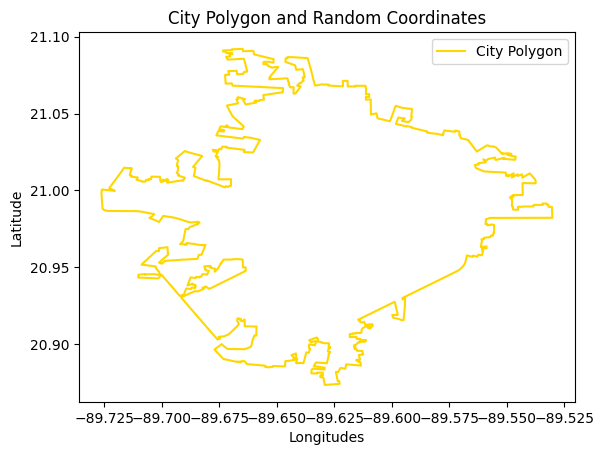

In [ ]:
# Plot the city polygon
if city_polygon.geom_type == 'Polygon':
    polygon_x, polygon_y = city_polygon.exterior.xy
    plt.plot(polygon_x, polygon_y, label='City Polygon', color='blue')
elif city_polygon.geom_type == 'MultiPolygon':
    for polygon in city_polygon.geoms:
        polygon_x, polygon_y = polygon.exterior.xy
        plt.plot(polygon_x, polygon_y, label='City Polygon', color='gold')

# Plot the random coordinates
# random_x, random_y = zip(*random_coordinates)
# plt.scatter(random_x, random_y, label='Random Coordinates', color='red')

# Set labels and legend
plt.xlabel('Longitudes')
plt.ylabel('Latitude')
plt.title('City Polygon and Random Coordinates')
plt.legend()

# Show the plot
plt.show()

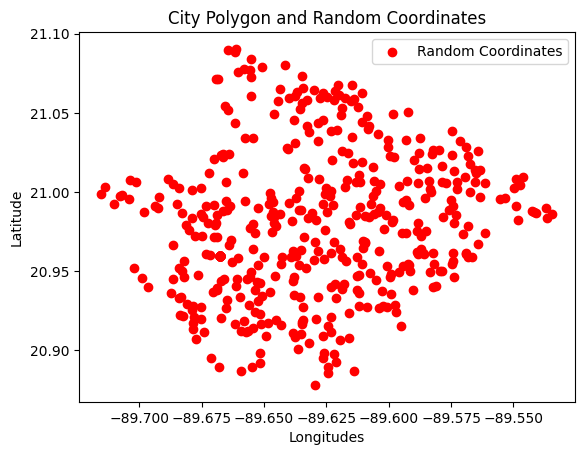

In [ ]:
# Plot the random coordinates
random_x, random_y = zip(*random_coordinates)
plt.scatter(random_x, random_y, label='Random Coordinates', color='red')

# Set labels and legend
plt.xlabel('Longitudes')
plt.ylabel('Latitude')
plt.title('City Polygon and Random Coordinates')
plt.legend()

# Show the plot
plt.show()

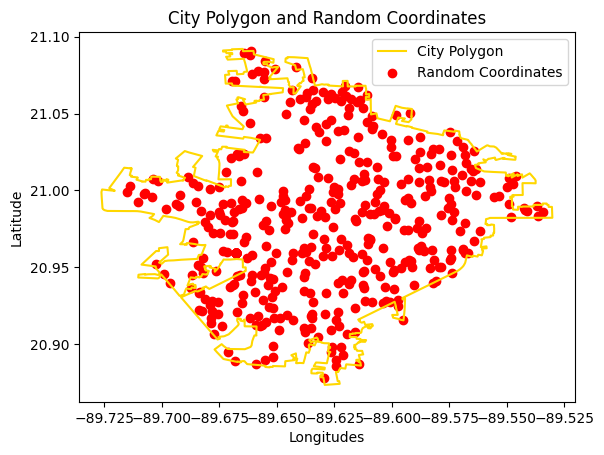

In [ ]:
if city_polygon.geom_type == 'Polygon':
    polygon_x, polygon_y = city_polygon.exterior.xy
    plt.plot(polygon_x, polygon_y, label='City Polygon', color='blue')
elif city_polygon.geom_type == 'MultiPolygon':
    for polygon in city_polygon.geoms:
        polygon_x, polygon_y = polygon.exterior.xy
        plt.plot(polygon_x, polygon_y, label='City Polygon', color='gold')

# Plot the random coordinates
random_x, random_y = zip(*random_coordinates)
plt.scatter(random_x, random_y, label='Random Coordinates', color='red')

# Set labels and legend
plt.xlabel('Longitudes')
plt.ylabel('Latitude')
plt.title('City Polygon and Random Coordinates')
plt.legend()

# Show the plot
plt.show()

Just to be clear, the image shown here is not the greatest definition of all. If you want to check a better definition please visit the following URL:

http://polygons.openstreetmap.fr/get_image.py?id=6265959&params=0

## Print the coordinates

In [ ]:
# Print the table
print("Longitude\tLatitude")
for coord in random_coordinates:
    print(f"{coord[0]}\t{coord[1]}")

Longitude	Latitude
-89.56671083954512	20.959078286769373
-89.6169756799846	20.956342180181704
-89.63759703165447	20.90807515807183
-89.66756771907309	20.959330688529153
-89.62848650048477	20.962567769274973
-89.65916844583145	20.912035556913025
-89.65096248755636	20.934203847667312
-89.61655935819914	21.007443696652487
-89.66756771907309	20.959330688529153
-89.66756771907309	20.959330688529153
-89.65845286001068	21.012039362222556
-89.59836297010224	20.982131520149043
-89.64288125639278	20.9590221990388
-89.63606726163532	20.953804529354922
-89.56829906089169	20.97845740177371
-89.6687131317326	20.985574642541117
-89.66756771907309	20.959330688529153
-89.66756771907309	20.959330688529153
-89.6201377141264	21.067716511208097
-89.57429472011924	20.961383255412233
-89.66756771907309	20.959330688529153
-89.68299715585037	20.986441183041578
-89.65801735819083	20.918427729057314
-89.63799208417196	20.93471548755644
-89.6646135689239	21.051824829151712
-89.710255226166	20.992387227554758
-89.

#Export to CSV


In [ ]:
# Turn the coordinates to a CSV file
csv_file_path = 'random_coordinates.csv'

with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Longitude', 'Latitude'])  # Write header

    for coord in random_coordinates:
        csv_writer.writerow(coord)

print(f'CSV file created: {csv_file_path}')

CSV file created: random_coordinates.csv


# Using the CSV

In [ ]:
rcoordf = pd.read_csv("/content/random_coordinates.csv")
rcoordf

,Longitude,Latitude
0,-89.566711,20.959078
1,-89.616976,20.956342
2,-89.637597,20.908075
3,-89.667568,20.959331
4,-89.628487,20.962568
...,...,...
522,-89.654602,20.979868
523,-89.681914,20.946484
524,-89.634739,21.056275
525,-89.667568,20.959331


In [ ]:
n = 527
incident_types = np.random.choice(['assault', 'car crash', 'drug selling', 'Burglary'], n, p=[0.4, 0.2, 0.3, 0.1]) #p mover probabilidades
data = {
    'incident_type': incident_types,
    'month': np.random.choice(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], n),
    'year': np.random.choice(range(2015, 2021), n)
}
df = pd.DataFrame(data)
df

,incident_type,month,year
0,drug selling,Oct,2016
1,assault,May,2020
2,car crash,Sep,2015
3,drug selling,Sep,2019
4,drug selling,Dec,2015
...,...,...,...
522,assault,Feb,2018
523,assault,Sep,2017
524,car crash,May,2018
525,drug selling,Oct,2016


In [ ]:
df_resultado = pd.concat([rcoordf, df], axis=1)
df_resultado

,Longitude,Latitude,incident_type,month,year
0,-89.566711,20.959078,drug selling,Oct,2016
1,-89.616976,20.956342,assault,May,2020
2,-89.637597,20.908075,car crash,Sep,2015
3,-89.667568,20.959331,drug selling,Sep,2019
4,-89.628487,20.962568,drug selling,Dec,2015
...,...,...,...,...,...
522,-89.654602,20.979868,assault,Feb,2018
523,-89.681914,20.946484,assault,Sep,2017
524,-89.634739,21.056275,car crash,May,2018
525,-89.667568,20.959331,drug selling,Oct,2016


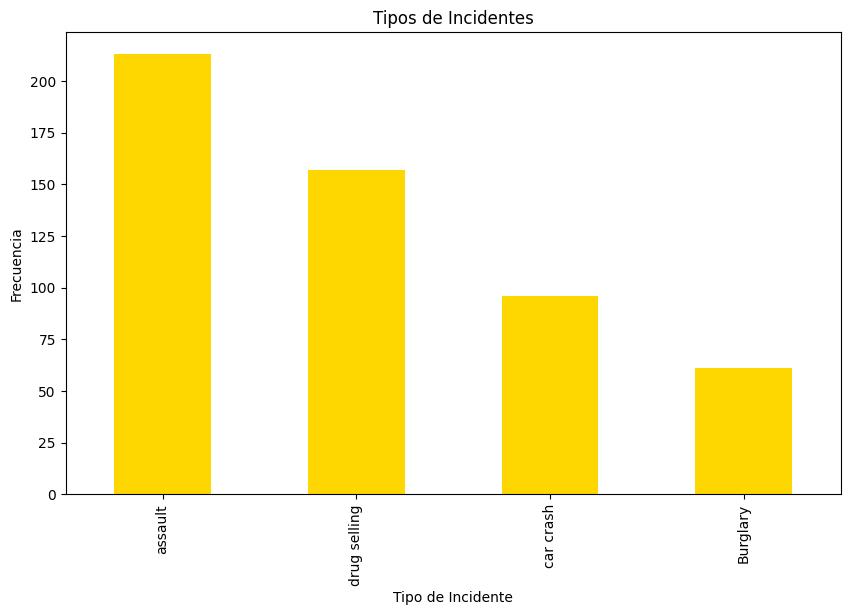

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
df['incident_type'].value_counts().plot(kind='bar', color='gold')

# Configurar el título y etiquetas del eje
plt.title('Tipos de Incidentes')
plt.xlabel('Tipo de Incidente')
plt.ylabel('Frecuencia')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


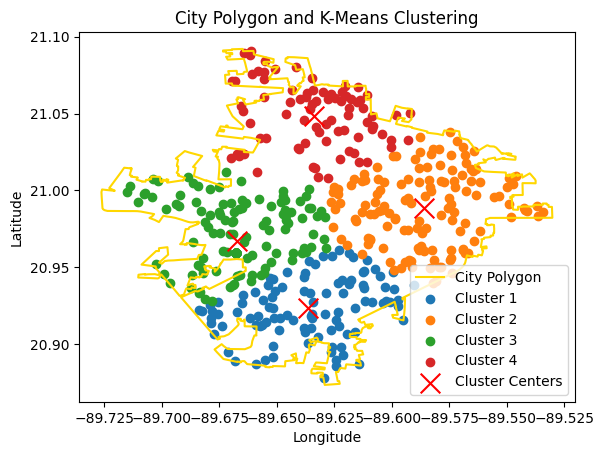

In [ ]:
# Extract latitude and longitude columns from the DataFrame
latitude = rcoordf['Latitude'].values
longitude = rcoordf['Longitude'].values

# Stack coordinates into a 2D array
coordinates = np.column_stack((latitude, longitude))

# Number of clusters you want to create
num_clusters = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(coordinates)

# Plot the city polygon
if city_polygon.geom_type == 'Polygon':
    polygon_x, polygon_y = city_polygon.exterior.xy
    plt.plot(polygon_x, polygon_y, label='City Polygon', color='blue')
elif city_polygon.geom_type == 'MultiPolygon':
    for polygon in city_polygon.geoms:
        polygon_x, polygon_y = polygon.exterior.xy
        plt.plot(polygon_x, polygon_y, label='City Polygon', color='gold')

# Plot the clusters
for i in range(num_clusters):
    cluster_points = coordinates[clusters == i]
    plt.scatter(cluster_points[:, 1], cluster_points[:, 0], label=f'Cluster {i + 1}')

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], marker='x', s=200, color='red', label='Cluster Centers')

# Set labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('City Polygon and K-Means Clustering')
plt.legend()

# Show the plot
plt.show()

# HEATMAPS (Prueba)

We can see the most "dangerous" areas in the city

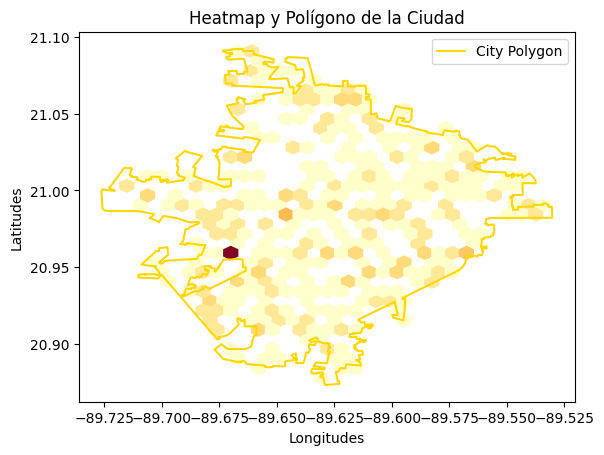

In [ ]:
import matplotlib.pyplot as plt

# Crear un heatmap con los puntos aleatorios
plt.hexbin(random_x, random_y, gridsize=30, bins='log', cmap='YlOrRd')

# Agregar el polígono de la ciudad
if city_polygon.geom_type == 'Polygon':
    polygon_x, polygon_y = city_polygon.exterior.xy
    plt.plot(polygon_x, polygon_y, label='City Polygon', color='blue')
elif city_polygon.geom_type == 'MultiPolygon':
    for polygon in city_polygon.geoms:
        polygon_x, polygon_y = polygon.exterior.xy
        plt.plot(polygon_x, polygon_y, label='City Polygon', color='gold')

# Configuración de etiquetas y leyenda
plt.xlabel('Longitudes')
plt.ylabel('Latitudes')
plt.title('Heatmap y Polígono de la Ciudad')

# Añadir leyenda para el polígono
plt.legend()

# Mostrar el gráfico
plt.show()


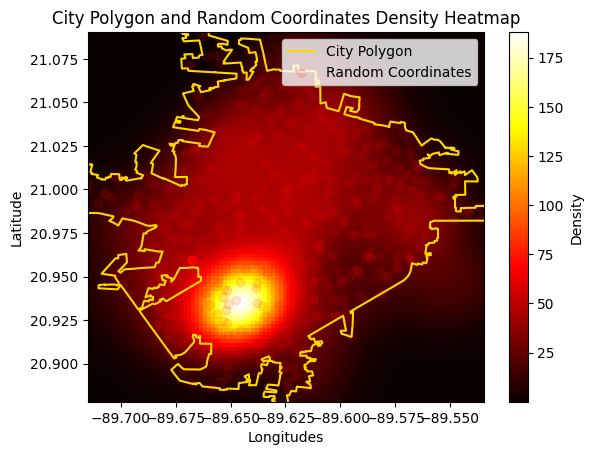

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

if city_polygon.geom_type == 'Polygon':
    polygon_x, polygon_y = city_polygon.exterior.xy
    plt.plot(polygon_x, polygon_y, label='City Polygon', color='blue')
elif city_polygon.geom_type == 'MultiPolygon':
    for polygon in city_polygon.geoms:
        polygon_x, polygon_y = polygon.exterior.xy
        plt.plot(polygon_x, polygon_y, label='City Polygon', color='gold')

# Plot the random coordinates
random_x, random_y = zip(*random_coordinates)
plt.scatter(random_x, random_y, label='Random Coordinates', color='red', alpha=0.1)  # Reduced alpha to show density

# Compute the KDE
xy = np.vstack([random_x, random_y])
kde = gaussian_kde(xy, bw_method='silverman')

# Evaluate the KDE on a grid
xmin, xmax = min(random_x), max(random_x)
ymin, ymax = min(random_y), max(random_y)
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
f = np.reshape(kde(positions).T, xx.shape)

# Plot the heatmap
plt.imshow(f, origin='lower', extent=[xmin, xmax, ymin, ymax], aspect='auto', cmap='hot')
plt.colorbar(label='Density')

# Set labels and legend
plt.xlabel('Longitudes')
plt.ylabel('Latitude')
plt.title('City Polygon and Random Coordinates Density Heatmap')
plt.legend()

# Show the plot
plt.show()


# SARIMAX model
This helps us to predict the next 12 months

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


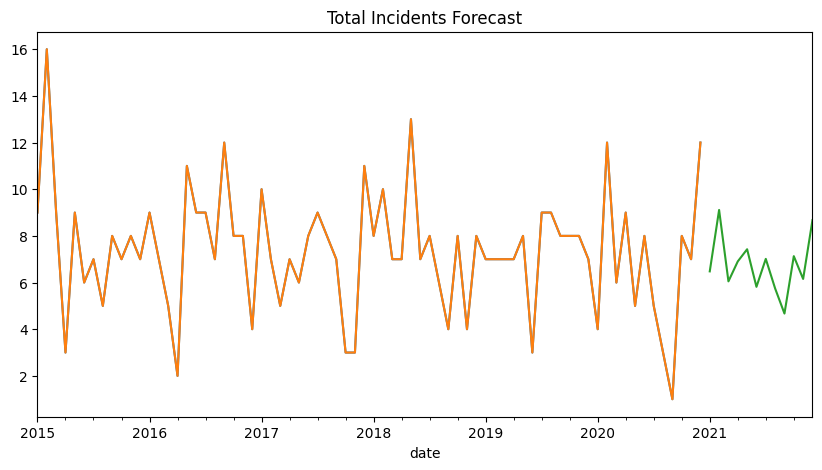

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Map string month names to numbers for conversion
month_to_num = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
df['month'] = df['month'].map(month_to_num)

# Create a 'date' column by combining 'year' and 'month'
df['date'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))

# Pivot the table to get counts of incidents for each month
df_pivot = df.pivot_table(index='date', columns='incident_type', aggfunc='size', fill_value=0)

# If you want to forecast the total incidents regardless of type, sum across the columns
df_pivot['total_incidents'] = df_pivot.sum(axis=1)

# Plot the data to see the trend and seasonality
df_pivot['total_incidents'].plot(title='Total Incidents Over Time')

# Fit a SARIMAX model (Seasonal ARIMA with eXogenous factors)
# You may need to find optimal parameters using model diagnostics or grid search
sarimax_model = SARIMAX(df_pivot['total_incidents'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_results = sarimax_model.fit()

# Forecast the next 12 months
forecast = sarimax_results.get_forecast(steps=12)
forecast_index = pd.date_range(df_pivot.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')
forecast_df = pd.DataFrame(forecast.predicted_mean.values, index=forecast_index, columns=['predicted_incidents'])

# Plot the forecast alongside the historical data
df_pivot['total_incidents'].plot(title='Total Incidents Forecast', figsize=(10, 5))
forecast_df['predicted_incidents'].plot()
plt.show()